# Probability and Statistics - Practical Class
## DA5400W - Foundations of Machine Learning
### Instructor: Dr. Arun B Ayyar
### IIT Madras

---

This notebook provides practical Python implementations of probability and statistics concepts covered in the course slides. We'll use NumPy, SciPy, Matplotlib, and Seaborn for demonstrations.

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import comb, perm, factorial
from itertools import permutations, combinations, combinations_with_replacement
import pandas as pd

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")

Libraries imported successfully!


## Part 1: Random Phenomena

### 1.1 Understanding Random Phenomena

**Random phenomena** are characterized by:
- Different outcomes for the same experimental conditions
- Variability associated with different outcomes
- Can be discrete (finite outcomes) or continuous (infinite outcomes)

**Types:**
- **Deterministic**: Outcome can be predicted with high confidence
- **Random**: Multiple possible outcomes with limited predictability

Results from 1000 coin flips:
  Heads: 503 (50.3%)
  Tails: 497 (49.7%)


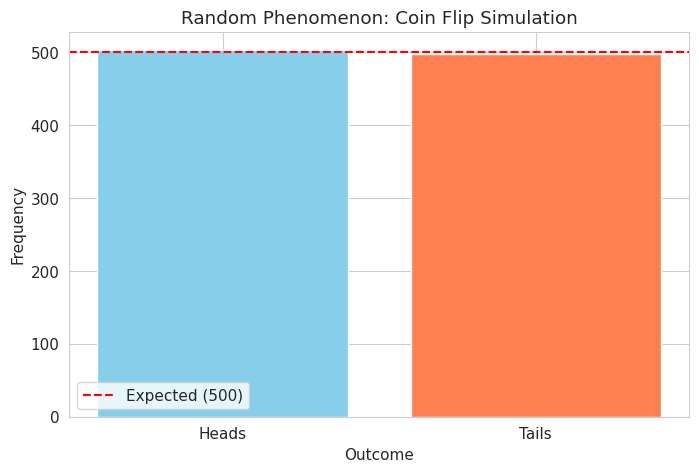

In [10]:
# Example 1: Simulating Random Phenomena - Coin Flips
np.random.seed(42)

# Simulate 1000 coin flips
n_flips = 1000
coin_flips = np.random.choice(['Heads', 'Tails'], size=n_flips, p=[0.5, 0.5])

# Count outcomes
unique, counts = np.unique(coin_flips, return_counts=True)
results = dict(zip(unique, counts))

print(f"Results from {n_flips} coin flips:")
for outcome, count in results.items():
    print(f"  {outcome}: {count} ({count/n_flips*100:.1f}%)")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'coral'])
plt.axhline(y=n_flips/2, color='r', linestyle='--', label='Expected (500)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Random Phenomenon: Coin Flip Simulation')
plt.legend()
plt.show()

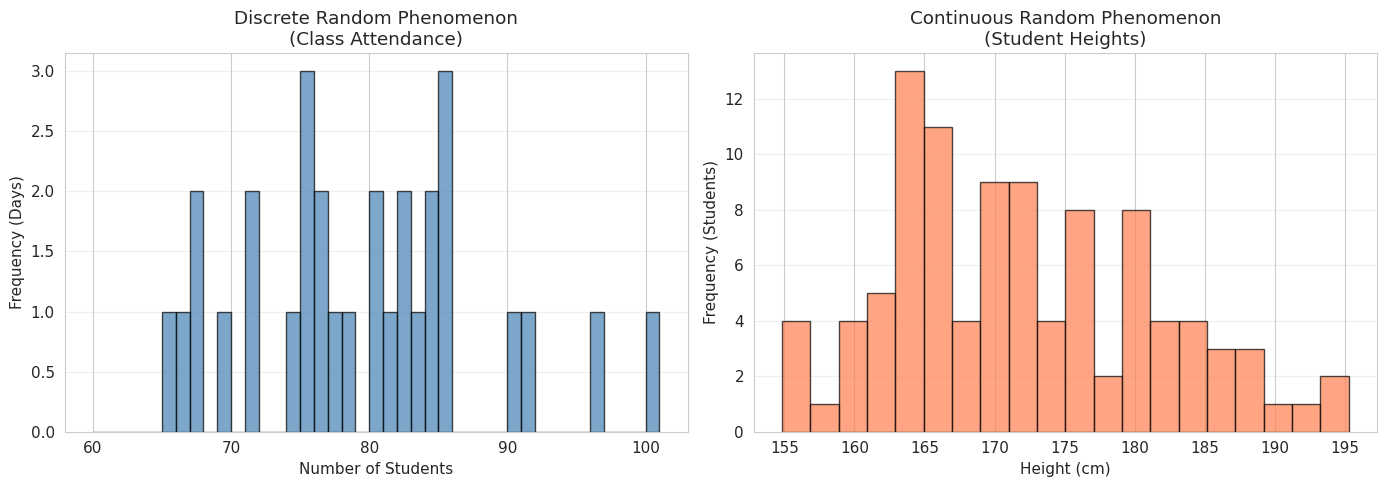

Discrete outcomes (attendance): [71 75 83 78 67 90 80 76 82 96]...
Continuous outcomes (heights): [159.19 180.53 169.6  176.82 170.28]...


In [11]:
# Example 2: Discrete vs Continuous Random Phenomena

# Discrete: Number of students attending class (0 to 100)
discrete_outcomes = np.random.randint(60, 101, size=30)  # 30 days of attendance

# Continuous: Average height of students in cm
continuous_outcomes = np.random.normal(loc=170, scale=10, size=100)  # 100 students

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot discrete
ax1.hist(discrete_outcomes, bins=range(60, 102), edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Number of Students')
ax1.set_ylabel('Frequency (Days)')
ax1.set_title('Discrete Random Phenomenon\n(Class Attendance)')
ax1.grid(axis='y', alpha=0.3)

# Plot continuous
ax2.hist(continuous_outcomes, bins=20, edgecolor='black', alpha=0.7, color='coral')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Frequency (Students)')
ax2.set_title('Continuous Random Phenomenon\n(Student Heights)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Discrete outcomes (attendance): {discrete_outcomes[:10]}...")
print(f"Continuous outcomes (heights): {continuous_outcomes[:5].round(2)}...")

## Part 2: Sample Space and Events

### 2.1 Definitions

- **Sample Space (Ω)**: The set of all possible outcomes of a random experiment
- **Event**: A subset of the sample space

### 2.2 Types of Events

- **Union (E ∪ F)**: Elements in either E or F (or both)
- **Intersection (E ∩ F)**: Elements in both E and F
- **Complement (Eᶜ)**: Elements not in E
- **Mutually Exclusive**: E ∩ F = ∅ (cannot both occur)
- **Independent**: Occurrence of one doesn't affect the other

In [12]:
# Example: Rolling Two Dice

# Sample space: All possible outcomes when rolling two dice
sample_space = [(i, j) for i in range(1, 7) for j in range(1, 7)]
print(f"Sample Space Size: {len(sample_space)}")
print(f"First 10 outcomes: {sample_space[:10]}")

# Define events
event_sum_7 = [outcome for outcome in sample_space if sum(outcome) == 7]
event_doubles = [outcome for outcome in sample_space if outcome[0] == outcome[1]]
event_first_even = [outcome for outcome in sample_space if outcome[0] % 2 == 0]

print(f"\nEvent 'Sum = 7': {event_sum_7}")
print(f"Event 'Doubles': {event_doubles}")
print(f"Event 'First die even': {len(event_first_even)} outcomes")

# Union and Intersection
union = set(event_sum_7) | set(event_doubles)
intersection = set(event_sum_7) & set(event_doubles)

print(f"\nUnion (Sum=7 OR Doubles): {len(union)} outcomes")
print(f"Intersection (Sum=7 AND Doubles): {list(intersection)}")
print(f"These events are mutually exclusive: {len(intersection) == 0}")

Sample Space Size: 36
First 10 outcomes: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4)]

Event 'Sum = 7': [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
Event 'Doubles': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
Event 'First die even': 18 outcomes

Union (Sum=7 OR Doubles): 12 outcomes
Intersection (Sum=7 AND Doubles): []
These events are mutually exclusive: True


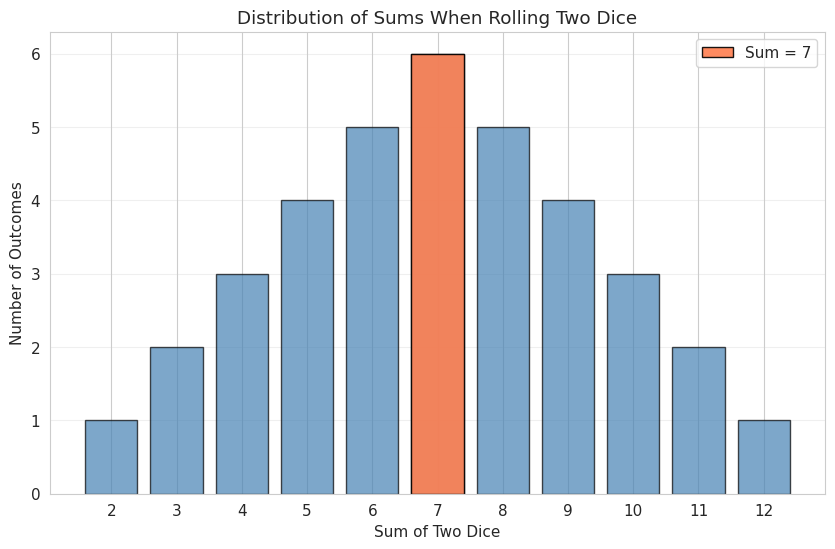


Probability of sum = 7: 6/36 = 0.1667


In [13]:
# Visualize dice roll outcomes
sums = [sum(outcome) for outcome in sample_space]
sum_counts = pd.Series(sums).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(sum_counts.index, sum_counts.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sum of Two Dice')
plt.ylabel('Number of Outcomes')
plt.title('Distribution of Sums When Rolling Two Dice')
plt.xticks(range(2, 13))
plt.grid(axis='y', alpha=0.3)

# Highlight sum = 7
plt.bar(7, sum_counts[7], color='coral', edgecolor='black', alpha=0.9, label='Sum = 7')
plt.legend()
plt.show()

print(f"\nProbability of sum = 7: {len(event_sum_7)}/{len(sample_space)} = {len(event_sum_7)/len(sample_space):.4f}")

## Part 3: Counting Principles

### 3.1 Permutations

**Permutations**: Arrangements where **order matters**

- **Without repetition**: P(n, r) = n! / (n-r)!
- **With repetition**: n^r
- **With multiple types**: n! / (k₁! × k₂! × ... × kₖ!)

### 3.2 Combinations

**Combinations**: Selections where **order doesn't matter**

- **Without repetition**: C(n, r) = n! / (r! × (n-r)!)
- **With repetition**: C(n+r-1, r)

In [14]:
# Example 1: Permutations - Arranging letters A, C, G, T

letters = ['A', 'C', 'G', 'T']
n = len(letters)

# Calculate using formula
perm_count = factorial(n)
print(f"Number of permutations of {letters}: {int(perm_count)}")

# Generate all permutations
all_perms = list(permutations(letters))
print(f"\nFirst 10 permutations:")
for i, perm in enumerate(all_perms[:10], 1):
    print(f"  {i}. {''.join(perm)}")

print(f"\nTotal generated: {len(all_perms)} (matches formula: {len(all_perms) == perm_count})")

Number of permutations of ['A', 'C', 'G', 'T']: 24

First 10 permutations:
  1. ACGT
  2. ACTG
  3. AGCT
  4. AGTC
  5. ATCG
  6. ATGC
  7. CAGT
  8. CATG
  9. CGAT
  10. CGTA

Total generated: 24 (matches formula: True)


In [15]:
# Example 2: Permutations without repetition - P(n, r)

# How many 4-digit numbers can be created from 0-9 without repetition?
n = 10
r = 4

# Using scipy
from scipy.special import perm, factorial # Re-import perm to ensure the function is used
p_nr = perm(n, r, exact=True)
print(f"P({n}, {r}) = {n}! / ({n}-{r})! = {p_nr}")

# Manual calculation
p_manual = factorial(n) // factorial(n - r)
print(f"Manual calculation: {int(p_manual)}")

# Example: Choosing 3 people for President, VP, Secretary from 17 candidates
n_candidates = 17
r_positions = 3
ways = perm(n_candidates, r_positions, exact=True)
print(f"\nWays to choose {r_positions} officers from {n_candidates} candidates: {ways}")

P(10, 4) = 10! / (10-4)! = 5040
Manual calculation: 5040

Ways to choose 3 officers from 17 candidates: 4080


In [16]:
# Example 3: Permutations with repetition

# How many same-length arrangements of "MACHCHI" are possible?
word = "MACHCHI"
n_total = len(word)

# Count frequency of each letter
from collections import Counter
letter_counts = Counter(word)
print(f"Word: {word}")
print(f"Letter frequencies: {dict(letter_counts)}")

# Formula: n! / (k1! × k2! × ... × km!)
numerator = factorial(n_total)
denominator = 1
for count in letter_counts.values():
    denominator *= factorial(count)

arrangements = numerator // denominator
print(f"\nNumber of arrangements: {n_total}! / (2! × 2! × 2!) = {int(arrangements)}")

Word: MACHCHI
Letter frequencies: {'M': 1, 'A': 1, 'C': 2, 'H': 2, 'I': 1}

Number of arrangements: 7! / (2! × 2! × 2!) = 1260


In [17]:
# Example 4: Combinations - Order doesn't matter

# Choosing a hockey team from 17 players (assume 11 players per team)
n_players = 17
r_team = 11

# Using scipy
c_nr = comb(n_players, r_team, exact=True)
print(f"C({n_players}, {r_team}) = {n_players}! / ({r_team}! × {n_players-r_team}!) = {c_nr}")

# Example: Choosing 3 ice cream flavors from 6 available
n_flavors = 6
r_scoops = 3
combinations_count = comb(n_flavors, r_scoops, exact=True)
print(f"\nWays to choose {r_scoops} ice cream flavors from {n_flavors}: {combinations_count}")

# Generate actual combinations
flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Mango', 'Pistachio', 'Butterscotch']
flavor_combos = list(combinations(flavors, r_scoops))
print(f"\nFirst 10 combinations:")
for i, combo in enumerate(flavor_combos[:10], 1):
    print(f"  {i}. {', '.join(combo)}")

C(17, 11) = 17! / (11! × 6!) = 12376

Ways to choose 3 ice cream flavors from 6: 20

First 10 combinations:
  1. Vanilla, Chocolate, Strawberry
  2. Vanilla, Chocolate, Mango
  3. Vanilla, Chocolate, Pistachio
  4. Vanilla, Chocolate, Butterscotch
  5. Vanilla, Strawberry, Mango
  6. Vanilla, Strawberry, Pistachio
  7. Vanilla, Strawberry, Butterscotch
  8. Vanilla, Mango, Pistachio
  9. Vanilla, Mango, Butterscotch
  10. Vanilla, Pistachio, Butterscotch


In [18]:
# Example 5: Combinations with repetition

# Choosing 3 scoops from 6 flavors WITH repetition allowed
n_flavors = 6
r_scoops = 3

# Formula: C(n+r-1, r)
combos_with_rep = comb(n_flavors + r_scoops - 1, r_scoops, exact=True)
print(f"Combinations with repetition: C({n_flavors}+{r_scoops}-1, {r_scoops}) = {combos_with_rep}")

# Generate some examples
flavors_short = ['V', 'C', 'S', 'M', 'P', 'B']  # Abbreviated names
combos_rep = list(combinations_with_replacement(flavors_short, r_scoops))
print(f"\nFirst 15 combinations (with repetition allowed):")
for i, combo in enumerate(combos_rep[:15], 1):
    print(f"  {i}. {'-'.join(combo)}")

print(f"\nTotal: {len(combos_rep)} combinations")

Combinations with repetition: C(6+3-1, 3) = 56

First 15 combinations (with repetition allowed):
  1. V-V-V
  2. V-V-C
  3. V-V-S
  4. V-V-M
  5. V-V-P
  6. V-V-B
  7. V-C-C
  8. V-C-S
  9. V-C-M
  10. V-C-P
  11. V-C-B
  12. V-S-S
  13. V-S-M
  14. V-S-P
  15. V-S-B

Total: 56 combinations


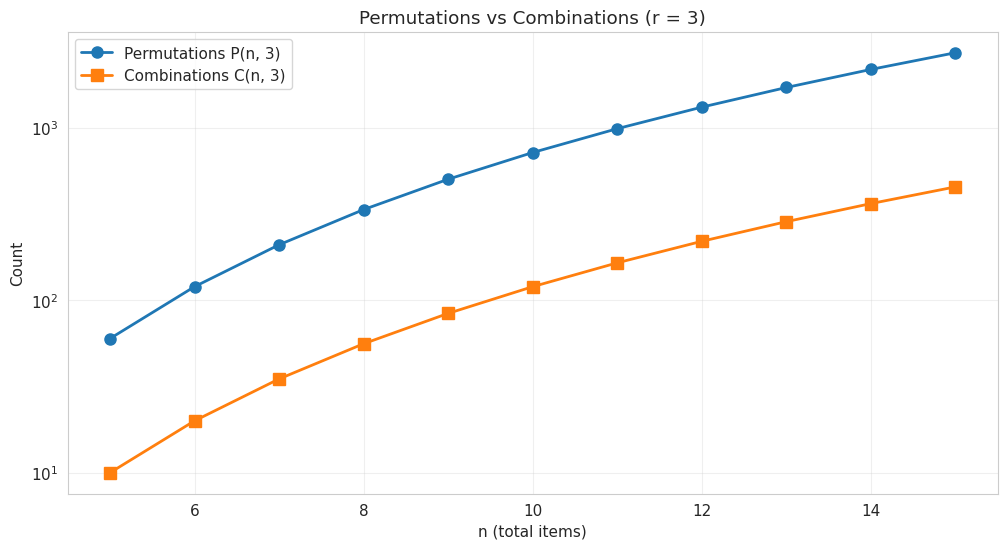

Key Insight: Permutations grow much faster than combinations
because order matters in permutations!


In [19]:
# Comparison: Permutations vs Combinations

n_values = range(5, 16)
r = 3

perms = [perm(n, r, exact=True) for n in n_values]
combs = [comb(n, r, exact=True) for n in n_values]

plt.figure(figsize=(12, 6))
plt.plot(n_values, perms, 'o-', label=f'Permutations P(n, {r})', linewidth=2, markersize=8)
plt.plot(n_values, combs, 's-', label=f'Combinations C(n, {r})', linewidth=2, markersize=8)
plt.xlabel('n (total items)')
plt.ylabel('Count')
plt.title(f'Permutations vs Combinations (r = {r})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print("Key Insight: Permutations grow much faster than combinations")
print("because order matters in permutations!")

## Part 4: Probability Axioms and Rules

### 4.1 Probability Axioms

For any event E in sample space Ω:
1. **Non-negativity**: P(E) ≥ 0
2. **Normalization**: P(Ω) = 1
3. **Additivity**: For mutually exclusive events, P(E₁ ∪ E₂) = P(E₁) + P(E₂)

### 4.2 Basic Rules

- **Complement Rule**: P(Eᶜ) = 1 - P(E)
- **Addition Rule**: P(E ∪ F) = P(E) + P(F) - P(E ∩ F)
- **Multiplication Rule** (independent events): P(E ∩ F) = P(E) × P(F)

In [20]:
# Example: Probability calculations with dice

# Sample space for two dice
sample_space = [(i, j) for i in range(1, 7) for j in range(1, 7)]
n_total = len(sample_space)

# Event A: Sum is 7
event_A = [(i, j) for i, j in sample_space if i + j == 7]
P_A = len(event_A) / n_total

# Event B: At least one die shows 6
event_B = [(i, j) for i, j in sample_space if i == 6 or j == 6]
P_B = len(event_B) / n_total

# Event A ∩ B: Sum is 7 AND at least one die shows 6
event_AB = [(i, j) for i, j in sample_space if (i + j == 7) and (i == 6 or j == 6)]
P_AB = len(event_AB) / n_total

# Event A ∪ B: Sum is 7 OR at least one die shows 6
event_AorB = set(event_A) | set(event_B)
P_AorB = len(event_AorB) / n_total

print("Event A (Sum = 7):")
print(f"  Outcomes: {event_A}")
print(f"  P(A) = {len(event_A)}/{n_total} = {P_A:.4f}")

print("\nEvent B (At least one 6):")
print(f"  Number of outcomes: {len(event_B)}")
print(f"  P(B) = {len(event_B)}/{n_total} = {P_B:.4f}")

print("\nEvent A ∩ B (Sum = 7 AND at least one 6):")
print(f"  Outcomes: {event_AB}")
print(f"  P(A ∩ B) = {len(event_AB)}/{n_total} = {P_AB:.4f}")

print("\nEvent A ∪ B (Sum = 7 OR at least one 6):")
print(f"  P(A ∪ B) = {len(event_AorB)}/{n_total} = {P_AorB:.4f}")

# Verify addition rule
P_AorB_calculated = P_A + P_B - P_AB
print(f"\nVerifying Addition Rule:")
print(f"  P(A ∪ B) = P(A) + P(B) - P(A ∩ B)")
print(f"  {P_AorB:.4f} = {P_A:.4f} + {P_B:.4f} - {P_AB:.4f}")
print(f"  {P_AorB:.4f} = {P_AorB_calculated:.4f} ✓")

Event A (Sum = 7):
  Outcomes: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
  P(A) = 6/36 = 0.1667

Event B (At least one 6):
  Number of outcomes: 11
  P(B) = 11/36 = 0.3056

Event A ∩ B (Sum = 7 AND at least one 6):
  Outcomes: [(1, 6), (6, 1)]
  P(A ∩ B) = 2/36 = 0.0556

Event A ∪ B (Sum = 7 OR at least one 6):
  P(A ∪ B) = 15/36 = 0.4167

Verifying Addition Rule:
  P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
  0.4167 = 0.1667 + 0.3056 - 0.0556
  0.4167 = 0.4167 ✓


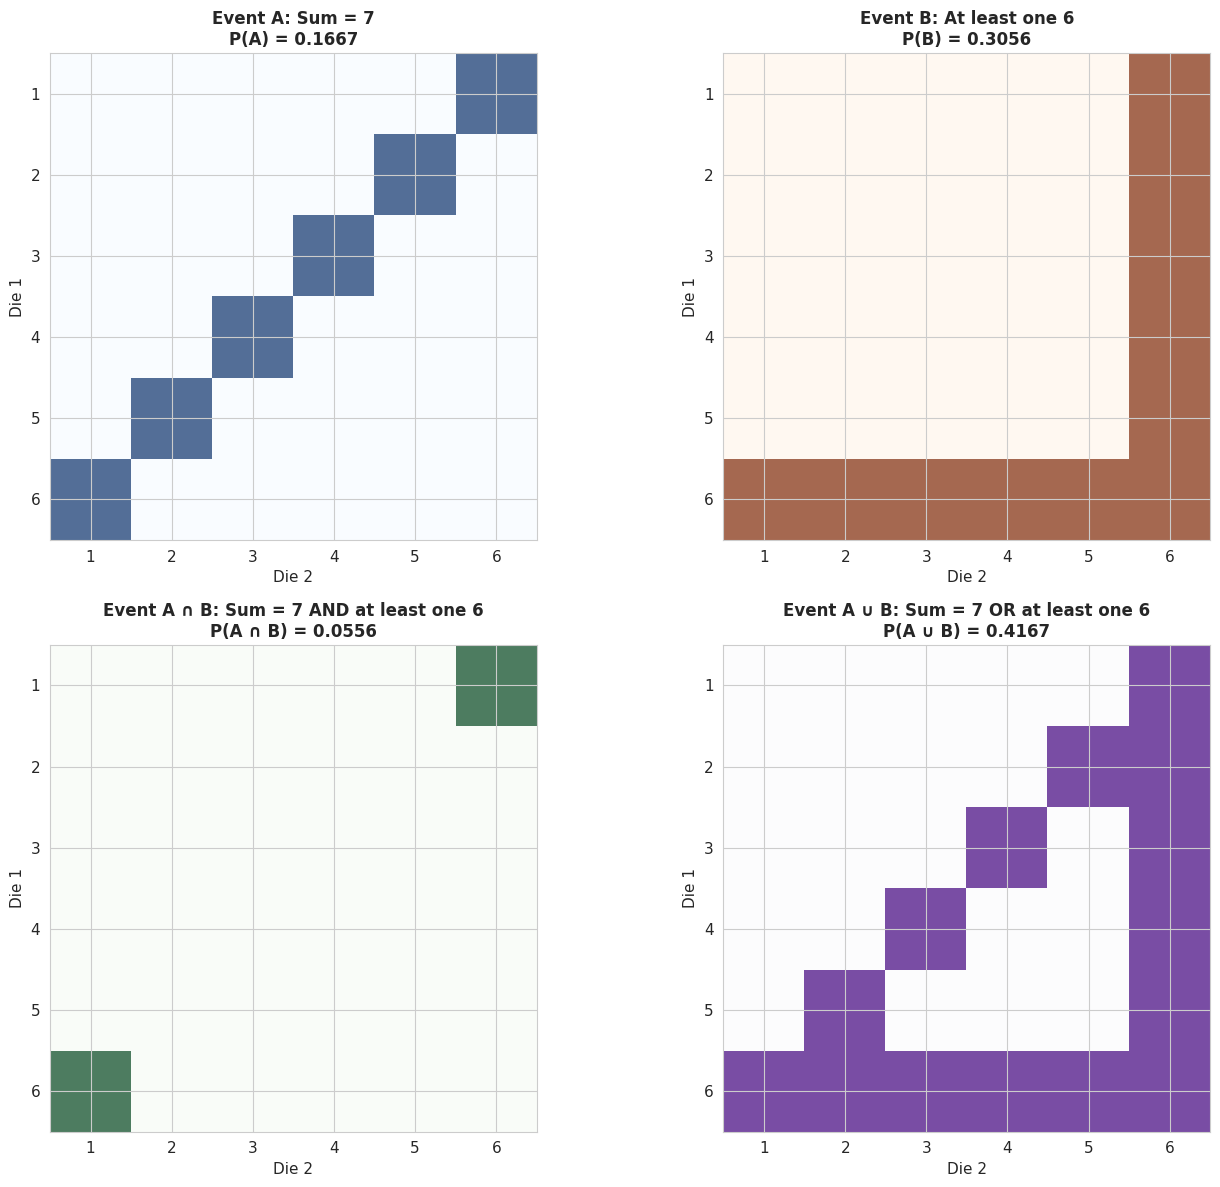

In [21]:
# Visualize probability concepts

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Create a grid representation of dice outcomes
grid = np.zeros((6, 6))

# Plot 1: Event A (Sum = 7)
grid_A = grid.copy()
for i, j in event_A:
    grid_A[i-1, j-1] = 1
axes[0, 0].imshow(grid_A, cmap='Blues', alpha=0.7)
axes[0, 0].set_title(f'Event A: Sum = 7\nP(A) = {P_A:.4f}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Die 2')
axes[0, 0].set_ylabel('Die 1')
axes[0, 0].set_xticks(range(6))
axes[0, 0].set_yticks(range(6))
axes[0, 0].set_xticklabels(range(1, 7))
axes[0, 0].set_yticklabels(range(1, 7))

# Plot 2: Event B (At least one 6)
grid_B = grid.copy()
for i, j in event_B:
    grid_B[i-1, j-1] = 1
axes[0, 1].imshow(grid_B, cmap='Oranges', alpha=0.7)
axes[0, 1].set_title(f'Event B: At least one 6\nP(B) = {P_B:.4f}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Die 2')
axes[0, 1].set_ylabel('Die 1')
axes[0, 1].set_xticks(range(6))
axes[0, 1].set_yticks(range(6))
axes[0, 1].set_xticklabels(range(1, 7))
axes[0, 1].set_yticklabels(range(1, 7))

# Plot 3: Event A ∩ B
grid_AB = grid.copy()
for i, j in event_AB:
    grid_AB[i-1, j-1] = 1
axes[1, 0].imshow(grid_AB, cmap='Greens', alpha=0.7)
axes[1, 0].set_title(f'Event A ∩ B: Sum = 7 AND at least one 6\nP(A ∩ B) = {P_AB:.4f}',
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Die 2')
axes[1, 0].set_ylabel('Die 1')
axes[1, 0].set_xticks(range(6))
axes[1, 0].set_yticks(range(6))
axes[1, 0].set_xticklabels(range(1, 7))
axes[1, 0].set_yticklabels(range(1, 7))

# Plot 4: Event A ∪ B
grid_AorB = grid.copy()
for i, j in event_AorB:
    grid_AorB[i-1, j-1] = 1
axes[1, 1].imshow(grid_AorB, cmap='Purples', alpha=0.7)
axes[1, 1].set_title(f'Event A ∪ B: Sum = 7 OR at least one 6\nP(A ∪ B) = {P_AorB:.4f}',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Die 2')
axes[1, 1].set_ylabel('Die 1')
axes[1, 1].set_xticks(range(6))
axes[1, 1].set_yticks(range(6))
axes[1, 1].set_xticklabels(range(1, 7))
axes[1, 1].set_yticklabels(range(1, 7))

plt.tight_layout()
plt.show()

## Part 5: Conditional Probability and Independence

### 5.1 Conditional Probability

The probability of event A given that event B has occurred:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### 5.2 Independence

Events A and B are independent if:
- P(A ∩ B) = P(A) × P(B)
- P(A|B) = P(A)
- P(B|A) = P(B)

In [22]:
# Example: Conditional Probability with Cards

# Standard deck: 52 cards, 4 suits, 13 ranks
n_cards = 52
n_hearts = 13
n_aces = 4
n_ace_of_hearts = 1

# Event A: Card is an Ace
P_A = n_aces / n_cards

# Event B: Card is a Heart
P_B = n_hearts / n_cards

# Event A ∩ B: Card is Ace of Hearts
P_AB = n_ace_of_hearts / n_cards

# Conditional probabilities
P_A_given_B = P_AB / P_B  # P(Ace | Heart)
P_B_given_A = P_AB / P_A  # P(Heart | Ace)

print("Card Probability Example:")
print(f"P(Ace) = {n_aces}/{n_cards} = {P_A:.4f}")
print(f"P(Heart) = {n_hearts}/{n_cards} = {P_B:.4f}")
print(f"P(Ace ∩ Heart) = {n_ace_of_hearts}/{n_cards} = {P_AB:.4f}")

print(f"\nConditional Probabilities:")
print(f"P(Ace | Heart) = P(Ace ∩ Heart) / P(Heart) = {P_AB:.4f} / {P_B:.4f} = {P_A_given_B:.4f}")
print(f"P(Heart | Ace) = P(Ace ∩ Heart) / P(Ace) = {P_AB:.4f} / {P_A:.4f} = {P_B_given_A:.4f}")

# Check independence
P_A_times_P_B = P_A * P_B
is_independent = np.isclose(P_AB, P_A_times_P_B)

print(f"\nIndependence Check:")
print(f"P(A) × P(B) = {P_A:.4f} × {P_B:.4f} = {P_A_times_P_B:.4f}")
print(f"P(A ∩ B) = {P_AB:.4f}")
print(f"Are they independent? {is_independent}")

Card Probability Example:
P(Ace) = 4/52 = 0.0769
P(Heart) = 13/52 = 0.2500
P(Ace ∩ Heart) = 1/52 = 0.0192

Conditional Probabilities:
P(Ace | Heart) = P(Ace ∩ Heart) / P(Heart) = 0.0192 / 0.2500 = 0.0769
P(Heart | Ace) = P(Ace ∩ Heart) / P(Ace) = 0.0192 / 0.0769 = 0.2500

Independence Check:
P(A) × P(B) = 0.0769 × 0.2500 = 0.0192
P(A ∩ B) = 0.0192
Are they independent? True


In [23]:
# Simulation: Demonstrating Independence

np.random.seed(42)
n_trials = 10000

# Simulate coin flips (independent events)
coin1 = np.random.choice([0, 1], size=n_trials)  # 0 = Tails, 1 = Heads
coin2 = np.random.choice([0, 1], size=n_trials)

# Calculate probabilities
P_coin1_heads = np.mean(coin1)
P_coin2_heads = np.mean(coin2)
P_both_heads = np.mean((coin1 == 1) & (coin2 == 1))

print("Coin Flip Independence (10,000 trials):")
print(f"P(Coin 1 = Heads) = {P_coin1_heads:.4f}")
print(f"P(Coin 2 = Heads) = {P_coin2_heads:.4f}")
print(f"P(Both Heads) = {P_both_heads:.4f}")
print(f"P(Coin 1) × P(Coin 2) = {P_coin1_heads * P_coin2_heads:.4f}")
print(f"\nDifference: {abs(P_both_heads - P_coin1_heads * P_coin2_heads):.4f}")
print("The events are independent! ✓")

Coin Flip Independence (10,000 trials):
P(Coin 1 = Heads) = 0.4987
P(Coin 2 = Heads) = 0.4993
P(Both Heads) = 0.2475
P(Coin 1) × P(Coin 2) = 0.2490

Difference: 0.0015
The events are independent! ✓


## Part 6: Bayes' Theorem

### Bayes' Theorem

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Where:
- P(A|B) is the **posterior probability**
- P(B|A) is the **likelihood**
- P(A) is the **prior probability**
- P(B) is the **marginal probability** (normalizing constant)

In [24]:
# Example: Medical Diagnosis with Bayes' Theorem

# A disease affects 1% of the population
P_disease = 0.01
P_no_disease = 1 - P_disease

# Test characteristics:
# - Sensitivity (True Positive Rate): P(Test+ | Disease) = 0.95
# - Specificity (True Negative Rate): P(Test- | No Disease) = 0.90
P_test_pos_given_disease = 0.95
P_test_neg_given_no_disease = 0.90
P_test_pos_given_no_disease = 1 - P_test_neg_given_no_disease  # False Positive Rate

# Calculate P(Test+) using law of total probability
P_test_pos = (P_test_pos_given_disease * P_disease +
              P_test_pos_given_no_disease * P_no_disease)

# Apply Bayes' Theorem: P(Disease | Test+)
P_disease_given_test_pos = (P_test_pos_given_disease * P_disease) / P_test_pos

print("Medical Diagnosis Example:")
print(f"\nPrior Information:")
print(f"  P(Disease) = {P_disease:.4f} ({P_disease*100:.1f}%)")
print(f"  P(No Disease) = {P_no_disease:.4f} ({P_no_disease*100:.1f}%)")

print(f"\nTest Characteristics:")
print(f"  Sensitivity: P(Test+ | Disease) = {P_test_pos_given_disease:.2f}")
print(f"  Specificity: P(Test- | No Disease) = {P_test_neg_given_no_disease:.2f}")
print(f"  False Positive Rate: P(Test+ | No Disease) = {P_test_pos_given_no_disease:.2f}")

print(f"\nCalculations:")
print(f"  P(Test+) = {P_test_pos:.4f}")

print(f"\nBayes' Theorem Result:")
print(f"  P(Disease | Test+) = {P_disease_given_test_pos:.4f} ({P_disease_given_test_pos*100:.2f}%)")

print(f"\n💡 Interpretation:")
print(f"   Even with a positive test, there's only a {P_disease_given_test_pos*100:.1f}% chance")
print(f"   of actually having the disease due to the low base rate (1%)!")

Medical Diagnosis Example:

Prior Information:
  P(Disease) = 0.0100 (1.0%)
  P(No Disease) = 0.9900 (99.0%)

Test Characteristics:
  Sensitivity: P(Test+ | Disease) = 0.95
  Specificity: P(Test- | No Disease) = 0.90
  False Positive Rate: P(Test+ | No Disease) = 0.10

Calculations:
  P(Test+) = 0.1085

Bayes' Theorem Result:
  P(Disease | Test+) = 0.0876 (8.76%)

💡 Interpretation:
   Even with a positive test, there's only a 8.8% chance
   of actually having the disease due to the low base rate (1%)!


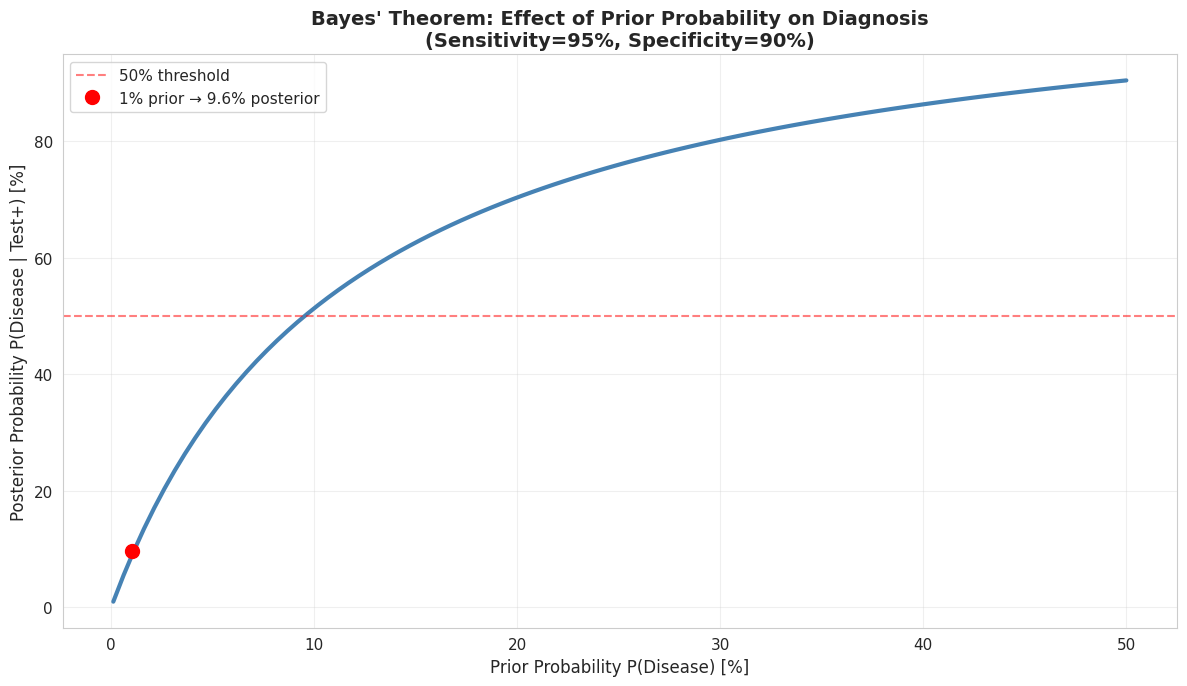

Key Insight: The posterior probability increases with the prior probability.
When disease is rare (low prior), even a positive test may not be very informative!


In [25]:
# Visualize Bayes' Theorem with different prior probabilities

prior_probs = np.linspace(0.001, 0.5, 100)
posterior_probs = []

sensitivity = 0.95
specificity = 0.90
false_positive_rate = 1 - specificity

for prior in prior_probs:
    P_test_pos = sensitivity * prior + false_positive_rate * (1 - prior)
    posterior = (sensitivity * prior) / P_test_pos
    posterior_probs.append(posterior)

plt.figure(figsize=(12, 7))
plt.plot(prior_probs * 100, np.array(posterior_probs) * 100, linewidth=3, color='steelblue')
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
plt.xlabel('Prior Probability P(Disease) [%]', fontsize=12)
plt.ylabel('Posterior Probability P(Disease | Test+) [%]', fontsize=12)
plt.title('Bayes\' Theorem: Effect of Prior Probability on Diagnosis\n(Sensitivity=95%, Specificity=90%)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Highlight the 1% prior case
idx_1_percent = np.argmin(np.abs(prior_probs - 0.01))
plt.plot(1, posterior_probs[idx_1_percent] * 100, 'ro', markersize=10,
         label=f'1% prior → {posterior_probs[idx_1_percent]*100:.1f}% posterior')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("Key Insight: The posterior probability increases with the prior probability.")
print("When disease is rare (low prior), even a positive test may not be very informative!")

## Part 7: Summary and Key Takeaways

### What We Covered:

1. **Random Phenomena**: Understanding discrete vs continuous outcomes
2. **Sample Space & Events**: Foundation of probability theory
3. **Counting Principles**:
   - Permutations (order matters)
   - Combinations (order doesn't matter)
   - With and without repetition
4. **Probability Rules**: Axioms, addition rule, multiplication rule
5. **Conditional Probability**: P(A|B) and independence
6. **Bayes' Theorem**: Updating beliefs with new evidence

### Key Formulas:

| Concept | Formula |
|---------|----------|
| Permutations (no rep) | P(n,r) = n!/(n-r)! |
| Permutations (with rep) | n^r |
| Combinations (no rep) | C(n,r) = n!/(r!(n-r)!) |
| Combinations (with rep) | C(n+r-1, r) |
| Conditional Probability | P(A\|B) = P(A∩B)/P(B) |
| Independence | P(A∩B) = P(A)×P(B) |
| Bayes' Theorem | P(A\|B) = P(B\|A)×P(A)/P(B) |

### Practice Exercises:

Try modifying the examples above to:
1. Calculate probabilities for different dice games
2. Solve real-world counting problems
3. Apply Bayes' theorem to different scenarios (spam detection, disease diagnosis, etc.)
4. Verify independence of events through simulation

In [26]:
# Exercise: Try your own probability problem!

# Example template: Calculate probability of drawing specific cards
def card_probability(favorable_outcomes, total_outcomes):
    """Calculate probability given favorable and total outcomes"""
    return favorable_outcomes / total_outcomes

# Your turn: Modify the values below
favorable = 4  # e.g., number of aces in deck
total = 52     # total cards in deck

prob = card_probability(favorable, total)
print(f"Probability: {prob:.4f} or {prob*100:.2f}%")

Probability: 0.0769 or 7.69%


## Part 8: Descriptive Statistics

### 8.1 Measures of Central Tendency

Descriptive statistics summarize and describe the main features of a dataset.

**Measures of Central Tendency:**
- **Mean (x̄)**: Average value = Σxᵢ/n
- **Median**: Middle value when data is ordered
  - If n is odd: median = x₍ₙ₊₁₎/₂
  - If n is even: median = (x₍ₙ/₂₎ + x₍ₙ/₂₊₁₎)/2
- **Mode**: Most frequently occurring value

**Choosing the Right Measure:**
- **Nominal (Categorical) data**: Mode
- **Symmetrical data**: Mean
- **Skewed data**: Median (robust to outliers)

In [27]:
# Example: Salary Data from SME Company (from slides)
salaries = np.array([20000, 15000, 12000, 35000, 8000, 11000, 20000, 25000, 120000, 315000, 12000])

# Calculate measures of central tendency
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
mode_result = stats.mode(salaries, keepdims=True)
mode_salary = mode_result.mode[0]

print("Salary Data Analysis:")
print(f"Salaries: {salaries}")
print(f"\nMeasures of Central Tendency:")
print(f"  Mean:   Rs. {mean_salary:,.2f}")
print(f"  Median: Rs. {median_salary:,.2f}")
print(f"  Mode:   Rs. {mode_salary:,.2f}")

# Identify outliers
print(f"\nNote: Employees 9 and 10 have very high salaries (Rs. 1,20,000 and Rs. 3,15,000)")
print(f"These are likely management positions and act as outliers.")

Salary Data Analysis:
Salaries: [ 20000  15000  12000  35000   8000  11000  20000  25000 120000 315000
  12000]

Measures of Central Tendency:
  Mean:   Rs. 53,909.09
  Median: Rs. 20,000.00
  Mode:   Rs. 12,000.00

Note: Employees 9 and 10 have very high salaries (Rs. 1,20,000 and Rs. 3,15,000)
These are likely management positions and act as outliers.


In [28]:
# Effect of outliers on mean
salaries_without_management = salaries[[0,1,2,3,4,5,6,7,10]]  # Remove employees 9 and 10

mean_without_mgmt = np.mean(salaries_without_management)
median_without_mgmt = np.median(salaries_without_management)

print("Impact of Removing Management Salaries (Employees 9 & 10):")
print(f"\nWith all employees:")
print(f"  Mean:   Rs. {mean_salary:,.2f}")
print(f"  Median: Rs. {median_salary:,.2f}")
print(f"\nWithout management (employees 9 & 10):")
print(f"  Mean:   Rs. {mean_without_mgmt:,.2f}")
print(f"  Median: Rs. {median_without_mgmt:,.2f}")
print(f"\n💡 Key Insight: The mean dropped by Rs. {mean_salary - mean_without_mgmt:,.2f}!")
print(f"   The median is more robust to outliers.")

Impact of Removing Management Salaries (Employees 9 & 10):

With all employees:
  Mean:   Rs. 53,909.09
  Median: Rs. 20,000.00

Without management (employees 9 & 10):
  Mean:   Rs. 17,555.56
  Median: Rs. 15,000.00

💡 Key Insight: The mean dropped by Rs. 36,353.54!
   The median is more robust to outliers.


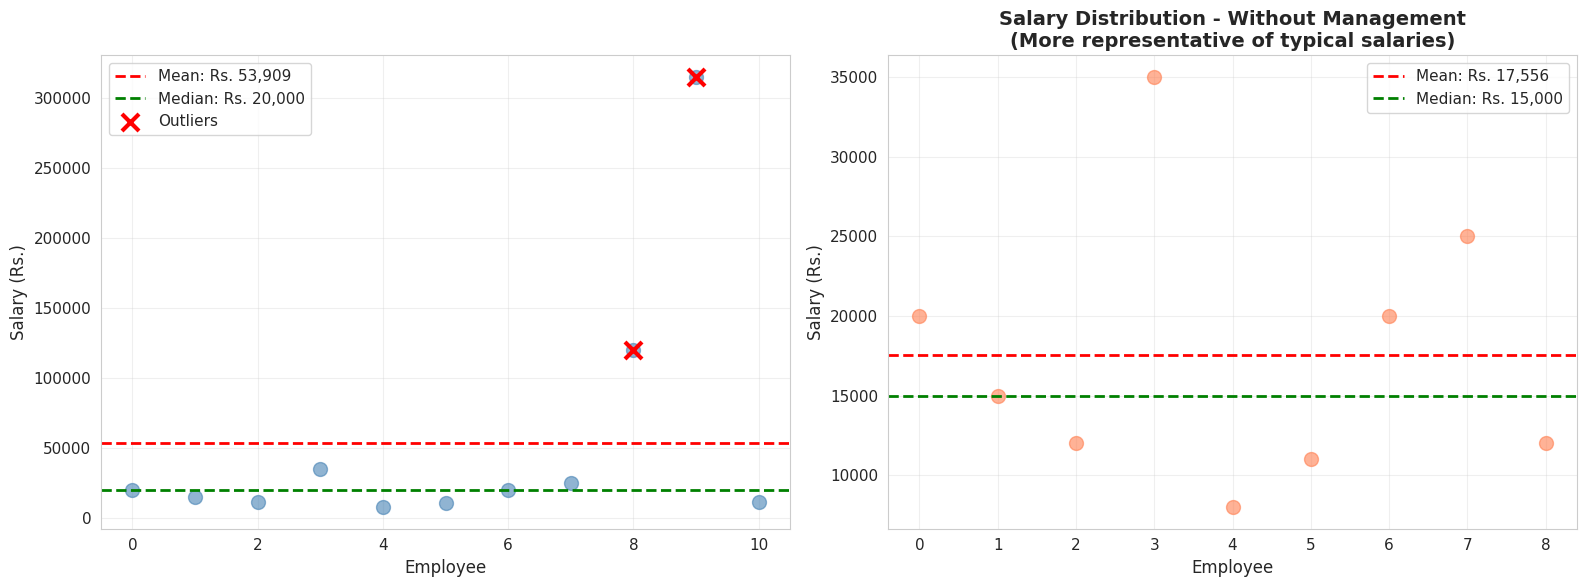

In [29]:
# Visualize the salary distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All employees
axes[0].scatter(range(len(salaries)), salaries, s=100, alpha=0.6, color='steelblue')
axes[0].axhline(y=mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: Rs. {mean_salary:,.0f}')
axes[0].axhline(y=median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: Rs. {median_salary:,.0f}')
axes[0].set_xlabel('Employee', fontsize=12)
axes[0].set_ylabel('Salary (Rs.)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Highlight outliers
axes[0].scatter([8, 9], [salaries[8], salaries[9]], s=150, color='red', marker='x', linewidths=3, label='Outliers', zorder=5)
axes[0].legend(fontsize=11)

# Plot 2: Without management
axes[1].scatter(range(len(salaries_without_management)), salaries_without_management, s=100, alpha=0.6, color='coral')
axes[1].axhline(y=mean_without_mgmt, color='red', linestyle='--', linewidth=2, label=f'Mean: Rs. {mean_without_mgmt:,.0f}')
axes[1].axhline(y=median_without_mgmt, color='green', linestyle='--', linewidth=2, label=f'Median: Rs. {median_without_mgmt:,.0f}')
axes[1].set_xlabel('Employee', fontsize=12)
axes[1].set_ylabel('Salary (Rs.)', fontsize=12)
axes[1].set_title('Salary Distribution - Without Management\n(More representative of typical salaries)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8.2 Measures of Dispersion

Measures of dispersion describe the spread or variability in the data.

**Sample Variance (σ²):**
8685\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}8685

Alternative formula:
8685\sigma^2 = \frac{1}{n-1}\left(\sum_{i=1}^{n}x_i^2 - n\bar{x}^2\right)8685

**Standard Deviation (σ):**
8685\sigma = \sqrt{\sigma^2}8685

The standard deviation is in the same units as the original data, making it easier to interpret.

In [30]:
# Calculate variance and standard deviation

# Using NumPy (ddof=1 for sample variance)
variance_all = np.var(salaries, ddof=1)
std_all = np.std(salaries, ddof=1)

variance_without_mgmt = np.var(salaries_without_management, ddof=1)
std_without_mgmt = np.std(salaries_without_management, ddof=1)

print("Measures of Dispersion:")
print(f"\nAll Employees:")
print(f"  Variance:  Rs.² {variance_all:,.2f}")
print(f"  Std Dev:   Rs.  {std_all:,.2f}")

print(f"\nWithout Management:")
print(f"  Variance:  Rs.² {variance_without_mgmt:,.2f}")
print(f"  Std Dev:   Rs.  {std_without_mgmt:,.2f}")

print(f"\n💡 Key Insight: Standard deviation decreased by Rs. {std_all - std_without_mgmt:,.2f}")
print(f"   when outliers were removed, showing less variability.")

Measures of Dispersion:

All Employees:
  Variance:  Rs.² 8,500,490,909.09
  Std Dev:   Rs.  92,198.11

Without Management:
  Variance:  Rs.² 71,777,777.78
  Std Dev:   Rs.  8,472.18

💡 Key Insight: Standard deviation decreased by Rs. 83,725.93
   when outliers were removed, showing less variability.


In [31]:
# Manual calculation to verify
n = len(salaries)
mean_manual = np.sum(salaries) / n

# Method 1: Using deviations from mean
deviations = salaries - mean_manual
squared_deviations = deviations ** 2
variance_manual_1 = np.sum(squared_deviations) / (n - 1)

# Method 2: Using alternative formula
sum_of_squares = np.sum(salaries ** 2)
variance_manual_2 = (sum_of_squares - n * mean_manual**2) / (n - 1)

std_manual = np.sqrt(variance_manual_1)

print("Manual Calculation Verification:")
print(f"\nMethod 1 (deviations): Variance = Rs.² {variance_manual_1:,.2f}")
print(f"Method 2 (alternative):  Variance = Rs.² {variance_manual_2:,.2f}")
print(f"NumPy result:            Variance = Rs.² {variance_all:,.2f}")
print(f"\nStandard Deviation = Rs. {std_manual:,.2f}")
print(f"\n✓ All methods match!")

Manual Calculation Verification:

Method 1 (deviations): Variance = Rs.² 8,500,490,909.09
Method 2 (alternative):  Variance = Rs.² 8,500,490,909.09
NumPy result:            Variance = Rs.² 8,500,490,909.09

Standard Deviation = Rs. 92,198.11

✓ All methods match!


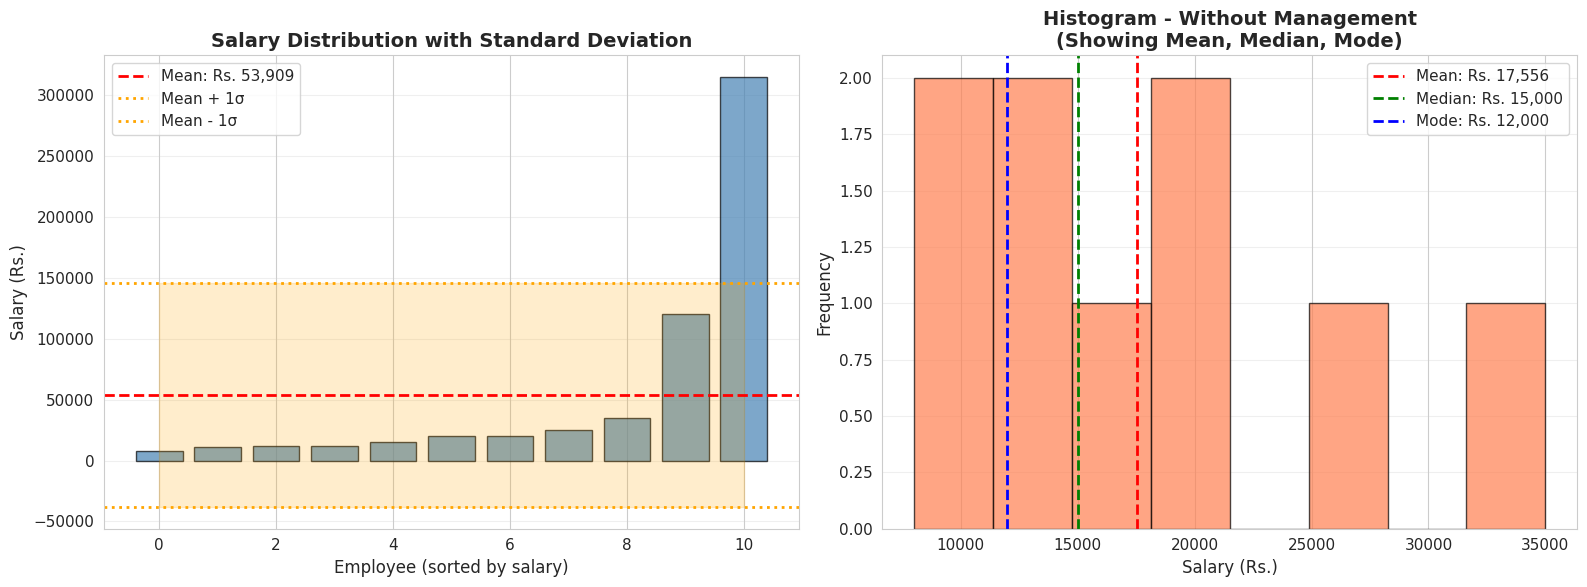

In [32]:
# Visualize variance and standard deviation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution with std dev bands
sorted_salaries = np.sort(salaries)
axes[0].bar(range(len(sorted_salaries)), sorted_salaries, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axhline(y=mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: Rs. {mean_salary:,.0f}')
axes[0].axhline(y=mean_salary + std_all, color='orange', linestyle=':', linewidth=2, label=f'Mean + 1σ')
axes[0].axhline(y=mean_salary - std_all, color='orange', linestyle=':', linewidth=2, label=f'Mean - 1σ')
axes[0].fill_between(range(len(sorted_salaries)), mean_salary - std_all, mean_salary + std_all, alpha=0.2, color='orange')
axes[0].set_xlabel('Employee (sorted by salary)', fontsize=12)
axes[0].set_ylabel('Salary (Rs.)', fontsize=12)
axes[0].set_title('Salary Distribution with Standard Deviation', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Histogram
axes[1].hist(salaries_without_management, bins=8, color='coral', alpha=0.7, edgecolor='black')
axes[1].axvline(x=mean_without_mgmt, color='red', linestyle='--', linewidth=2, label=f'Mean: Rs. {mean_without_mgmt:,.0f}')
axes[1].axvline(x=median_without_mgmt, color='green', linestyle='--', linewidth=2, label=f'Median: Rs. {median_without_mgmt:,.0f}')
axes[1].axvline(x=mode_salary, color='blue', linestyle='--', linewidth=2, label=f'Mode: Rs. {mode_salary:,.0f}')
axes[1].set_xlabel('Salary (Rs.)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Histogram - Without Management\n(Showing Mean, Median, Mode)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 8.3 Comparing Datasets with Different Spreads

Let's create two datasets with the same mean but different variances to understand dispersion better.

Comparing Two Datasets:

Dataset 1 (Low Variance):
  Mean: 49.48
  Std Dev: 4.54
  Variance: 20.62

Dataset 2 (High Variance):
  Mean: 50.33
  Std Dev: 14.31
  Variance: 204.63


/tmp/ipython-input-709489700.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([data_low_var, data_high_var], labels=['Low Variance', 'High Variance'], patch_artist=True,


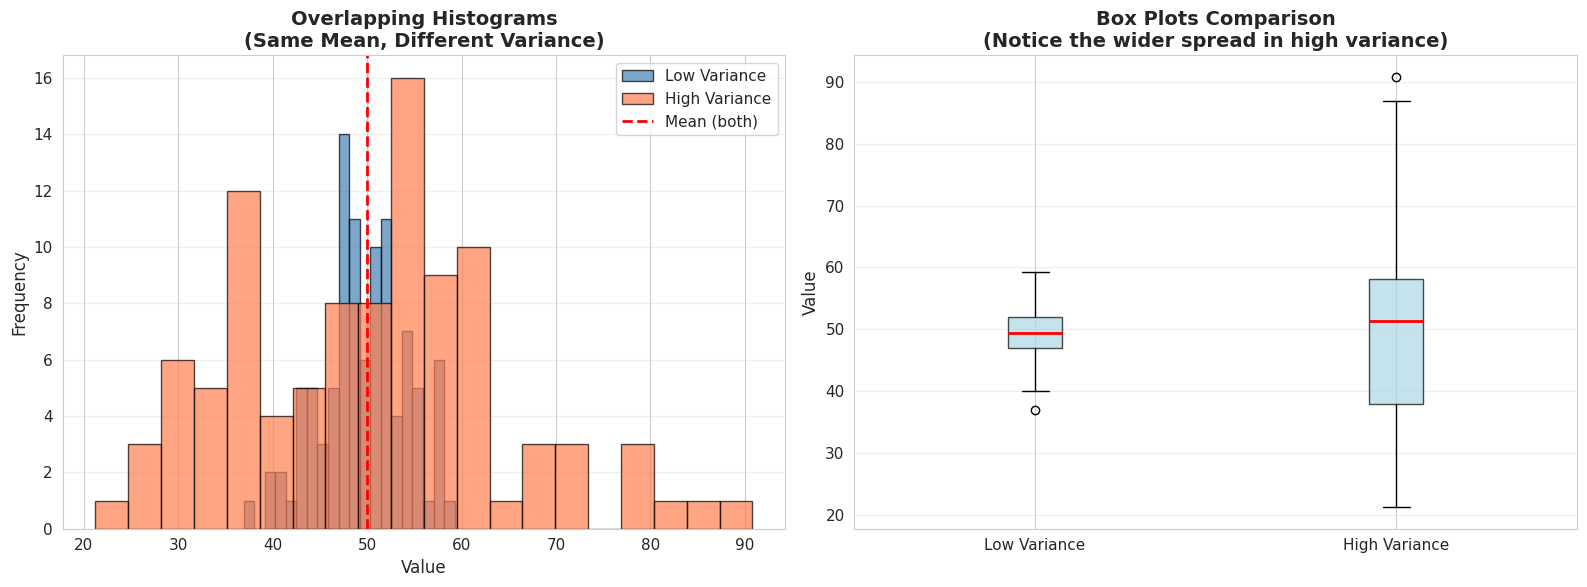


💡 Key Insight: Both datasets have the same mean (~50), but the high variance
   dataset has much more spread, showing greater variability in the data.


In [33]:
# Create two datasets with same mean but different spreads
np.random.seed(42)

# Dataset 1: Low variance
data_low_var = np.random.normal(loc=50, scale=5, size=100)

# Dataset 2: High variance
data_high_var = np.random.normal(loc=50, scale=15, size=100)

print("Comparing Two Datasets:")
print(f"\nDataset 1 (Low Variance):")
print(f"  Mean: {np.mean(data_low_var):.2f}")
print(f"  Std Dev: {np.std(data_low_var, ddof=1):.2f}")
print(f"  Variance: {np.var(data_low_var, ddof=1):.2f}")

print(f"\nDataset 2 (High Variance):")
print(f"  Mean: {np.mean(data_high_var):.2f}")
print(f"  Std Dev: {np.std(data_high_var, ddof=1):.2f}")
print(f"  Variance: {np.var(data_high_var, ddof=1):.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograms
axes[0].hist(data_low_var, bins=20, alpha=0.7, color='steelblue', edgecolor='black', label='Low Variance')
axes[0].hist(data_high_var, bins=20, alpha=0.7, color='coral', edgecolor='black', label='High Variance')
axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='Mean (both)')
axes[0].set_xlabel('Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Overlapping Histograms\n(Same Mean, Different Variance)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plots
axes[1].boxplot([data_low_var, data_high_var], labels=['Low Variance', 'High Variance'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_title('Box Plots Comparison\n(Notice the wider spread in high variance)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Both datasets have the same mean (~50), but the high variance")
print("   dataset has much more spread, showing greater variability in the data.")

### 8.4 Summary Statistics

Let's create a comprehensive summary function for any dataset.

In [34]:
def descriptive_statistics(data, name="Dataset"):
    """Calculate and display comprehensive descriptive statistics"""
    print(f"=" * 60)
    print(f"Descriptive Statistics: {name}")
    print(f"=" * 60)

    # Central tendency
    mean_val = np.mean(data)
    median_val = np.median(data)
    mode_result = stats.mode(data, keepdims=True)
    mode_val = mode_result.mode[0] if len(mode_result.mode) > 0 else 'N/A'

    # Dispersion
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)
    range_val = np.max(data) - np.min(data)

    # Quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Other
    n = len(data)
    min_val = np.min(data)
    max_val = np.max(data)

    print(f"\nSample Size: {n}")
    print(f"\nCentral Tendency:")
    print(f"  Mean:       {mean_val:,.2f}")
    print(f"  Median:     {median_val:,.2f}")
    print(f"  Mode:       {mode_val}")

    print(f"\nDispersion:")
    print(f"  Variance:   {variance:,.2f}")
    print(f"  Std Dev:    {std_dev:,.2f}")
    print(f"  Range:      {range_val:,.2f}")
    print(f"  IQR:        {iqr:,.2f}")

    print(f"\nRange:")
    print(f"  Minimum:    {min_val:,.2f}")
    print(f"  Q1 (25%):   {q1:,.2f}")
    print(f"  Q2 (50%):   {median_val:,.2f}")
    print(f"  Q3 (75%):   {q3:,.2f}")
    print(f"  Maximum:    {max_val:,.2f}")
    print(f"=" * 60)

# Test with salary data
descriptive_statistics(salaries, "SME Company Salaries (All Employees)")
print("\n")
descriptive_statistics(salaries_without_management, "SME Company Salaries (Without Management)")

Descriptive Statistics: SME Company Salaries (All Employees)

Sample Size: 11

Central Tendency:
  Mean:       53,909.09
  Median:     20,000.00
  Mode:       12000

Dispersion:
  Variance:   8,500,490,909.09
  Std Dev:    92,198.11
  Range:      307,000.00
  IQR:        18,000.00

Range:
  Minimum:    8,000.00
  Q1 (25%):   12,000.00
  Q2 (50%):   20,000.00
  Q3 (75%):   30,000.00
  Maximum:    315,000.00


Descriptive Statistics: SME Company Salaries (Without Management)

Sample Size: 9

Central Tendency:
  Mean:       17,555.56
  Median:     15,000.00
  Mode:       12000

Dispersion:
  Variance:   71,777,777.78
  Std Dev:    8,472.18
  Range:      27,000.00
  IQR:        8,000.00

Range:
  Minimum:    8,000.00
  Q1 (25%):   12,000.00
  Q2 (50%):   15,000.00
  Q3 (75%):   20,000.00
  Maximum:    35,000.00


## Part 9: Practice Exercises

Try these exercises to reinforce your understanding!

In [35]:
# Exercise 1: Analyze exam scores
exam_scores = np.array([78, 85, 92, 88, 76, 95, 82, 89, 91, 87, 84, 90, 79, 88, 93])

print("Exercise 1: Exam Scores Analysis")
print(f"Scores: {exam_scores}")
print(f"\nYour task: Calculate mean, median, mode, variance, and standard deviation.")
print(f"\nSolution:")
descriptive_statistics(exam_scores, "Exam Scores")

Exercise 1: Exam Scores Analysis
Scores: [78 85 92 88 76 95 82 89 91 87 84 90 79 88 93]

Your task: Calculate mean, median, mode, variance, and standard deviation.

Solution:
Descriptive Statistics: Exam Scores

Sample Size: 15

Central Tendency:
  Mean:       86.47
  Median:     88.00
  Mode:       88

Dispersion:
  Variance:   32.55
  Std Dev:    5.71
  Range:      19.00
  IQR:        7.50

Range:
  Minimum:    76.00
  Q1 (25%):   83.00
  Q2 (50%):   88.00
  Q3 (75%):   90.50
  Maximum:    95.00


In [36]:
# Exercise 2: Compare two teaching methods
method_A_scores = np.array([75, 78, 82, 79, 81, 77, 80, 76, 83, 78])
method_B_scores = np.array([85, 88, 82, 90, 87, 84, 89, 86, 91, 83])

print("Exercise 2: Compare Teaching Methods")
print(f"\nMethod A: {method_A_scores}")
print(f"Method B: {method_B_scores}")
print(f"\nWhich method is more effective? Which has more consistent results?")
print(f"\nSolution:")
descriptive_statistics(method_A_scores, "Method A")
print("\n")
descriptive_statistics(method_B_scores, "Method B")

print(f"\n💡 Conclusion:")
print(f"   Method B has higher mean ({np.mean(method_B_scores):.1f} vs {np.mean(method_A_scores):.1f})")
print(f"   Method A has lower std dev ({np.std(method_A_scores, ddof=1):.2f} vs {np.std(method_B_scores, ddof=1):.2f})")
print(f"   → Method B is more effective, but Method A is more consistent.")

Exercise 2: Compare Teaching Methods

Method A: [75 78 82 79 81 77 80 76 83 78]
Method B: [85 88 82 90 87 84 89 86 91 83]

Which method is more effective? Which has more consistent results?

Solution:
Descriptive Statistics: Method A

Sample Size: 10

Central Tendency:
  Mean:       78.90
  Median:     78.50
  Mode:       78

Dispersion:
  Variance:   6.77
  Std Dev:    2.60
  Range:      8.00
  IQR:        3.50

Range:
  Minimum:    75.00
  Q1 (25%):   77.25
  Q2 (50%):   78.50
  Q3 (75%):   80.75
  Maximum:    83.00


Descriptive Statistics: Method B

Sample Size: 10

Central Tendency:
  Mean:       86.50
  Median:     86.50
  Mode:       82

Dispersion:
  Variance:   9.17
  Std Dev:    3.03
  Range:      9.00
  IQR:        4.50

Range:
  Minimum:    82.00
  Q1 (25%):   84.25
  Q2 (50%):   86.50
  Q3 (75%):   88.75
  Maximum:    91.00

💡 Conclusion:
   Method B has higher mean (86.5 vs 78.9)
   Method A has lower std dev (2.60 vs 3.03)
   → Method B is more effective, but Method A is

## Part 10: Parameter Estimation

### 10.1 Introduction to Parameter Estimation

Parameter estimation is the process of inferring unknown parameters in a model or distribution from observed data.

**Two Main Problems:**
1. Estimate parameters of a distribution from data (e.g., μ, σ²)
2. Estimate parameters of models from data (e.g., y = α₁x₁ + α₂x₂)

**Key Concepts:**
- **Estimator**: A function of the sample data used to estimate a parameter
- **Point Estimator**: Produces a single numerical value as the estimate
- **Interval Estimator**: Produces a range of plausible values
- **Statistic**: Any function of observations in a random sample, θ̂ = g(X₁, X₂, ..., Xₙ)

In [37]:
# Example: Estimating population mean and variance from sample
np.random.seed(42)

# True population parameters (unknown in real scenarios)
true_mu = 50
true_sigma = 10

# Draw a random sample
sample_size = 30
sample = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)

# Point estimators
mu_hat = np.mean(sample)  # Sample mean estimates population mean
sigma2_hat = np.var(sample, ddof=1)  # Sample variance estimates population variance
sigma_hat = np.std(sample, ddof=1)  # Sample std dev

print("Parameter Estimation Example")
print("=" * 60)
print(f"Sample size: {sample_size}")
print(f"\nTrue Parameters (Population):")
print(f"  μ (mean):     {true_mu}")
print(f"  σ² (variance): {true_sigma**2}")
print(f"  σ (std dev):   {true_sigma}")
print(f"\nEstimated Parameters (from sample):")
print(f"  μ̂ (mean):     {mu_hat:.2f}")
print(f"  σ̂² (variance): {sigma2_hat:.2f}")
print(f"  σ̂ (std dev):   {sigma_hat:.2f}")
print(f"\nEstimation Error:")
print(f"  Mean error:     {abs(mu_hat - true_mu):.2f}")
print(f"  Variance error: {abs(sigma2_hat - true_sigma**2):.2f}")

Parameter Estimation Example
Sample size: 30

True Parameters (Population):
  μ (mean):     50
  σ² (variance): 100
  σ (std dev):   10

Estimated Parameters (from sample):
  μ̂ (mean):     48.12
  σ̂² (variance): 81.00
  σ̂ (std dev):   9.00

Estimation Error:
  Mean error:     1.88
  Variance error: 19.00


### 10.2 Sampling Distribution

The **sampling distribution** is the probability distribution of a statistic.

**Key Result:** For a random sample from N(μ, σ²):
- Sample mean X̄ ~ N(μ, σ²/n)
- As sample size n increases, the estimate becomes more precise

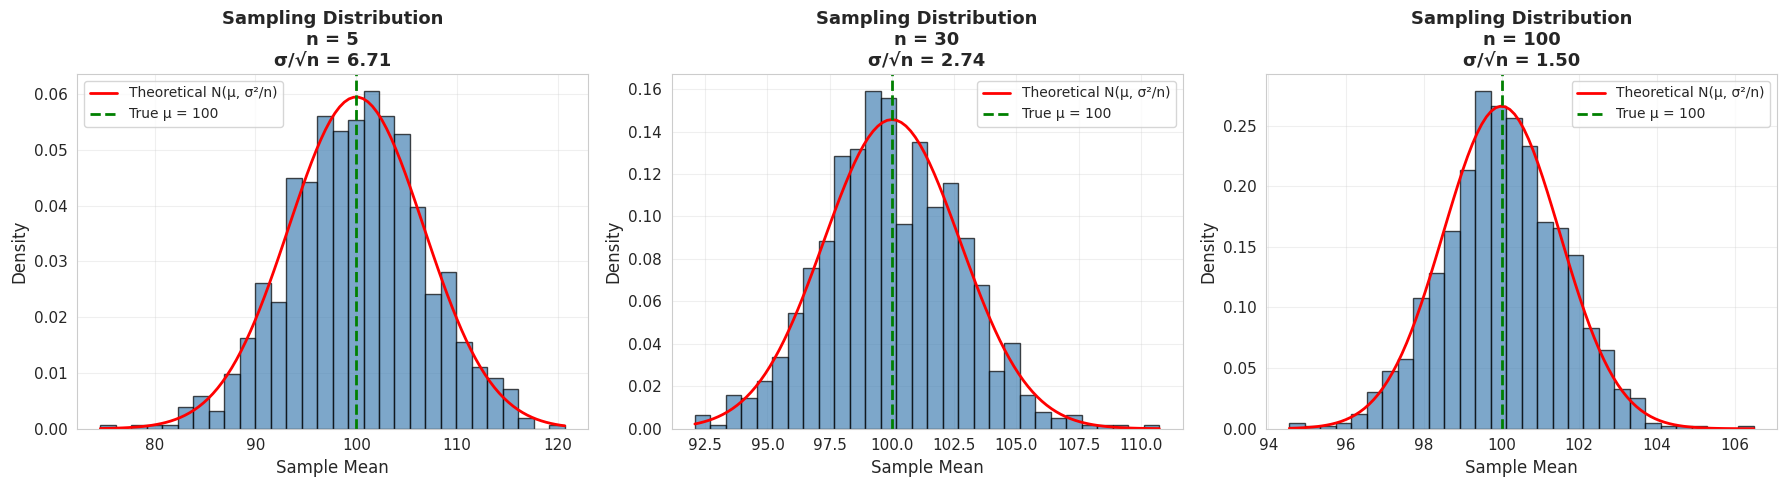


💡 Key Insight: As sample size increases, the sampling distribution
   becomes narrower (smaller variance), making estimates more precise!


In [38]:
# Demonstrate sampling distribution of the mean
np.random.seed(42)

# Population parameters
pop_mu = 100
pop_sigma = 15

# Experiment: Draw many samples and compute their means
n_samples = 1000
sample_sizes = [5, 30, 100]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n in enumerate(sample_sizes):
    # Draw n_samples, each of size n
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.normal(loc=pop_mu, scale=pop_sigma, size=n)
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    # Theoretical sampling distribution
    theoretical_std = pop_sigma / np.sqrt(n)

    # Plot histogram
    axes[idx].hist(sample_means, bins=30, density=True, alpha=0.7, color="steelblue", edgecolor="black")

    # Overlay theoretical normal distribution
    x_range = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical_pdf = stats.norm.pdf(x_range, loc=pop_mu, scale=theoretical_std)
    axes[idx].plot(x_range, theoretical_pdf, "r-", linewidth=2, label="Theoretical N(μ, σ²/n)")

    axes[idx].axvline(x=pop_mu, color="green", linestyle="--", linewidth=2, label=f"True μ = {pop_mu}")
    axes[idx].set_xlabel("Sample Mean", fontsize=12)
    axes[idx].set_ylabel("Density", fontsize=12)
    axes[idx].set_title(f"Sampling Distribution\nn = {n}\nσ/√n = {theoretical_std:.2f}", fontsize=13, fontweight="bold")
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: As sample size increases, the sampling distribution")
print("   becomes narrower (smaller variance), making estimates more precise!")

### 10.3 Properties of Estimators

**Unbiased Estimator:**
- An estimator θ̂ is unbiased if E(θ̂) = θₜ
- On average, the estimator equals the true parameter value

**Precision:**
- Variability of estimates from different random samples
- Lower variance = more precise estimator

**Consistency:**
- As n → ∞, θ̂ → θₜ (estimate converges to true value)

Comparing Biased vs Unbiased Estimators
True parameter value: 50

Unbiased Estimator (sample mean):
  Mean of estimates: 49.98
  Bias: -0.02
  Variance: 4.84

Biased Estimator (sample mean + 5):
  Mean of estimates: 54.98
  Bias: 4.98
  Variance: 4.84


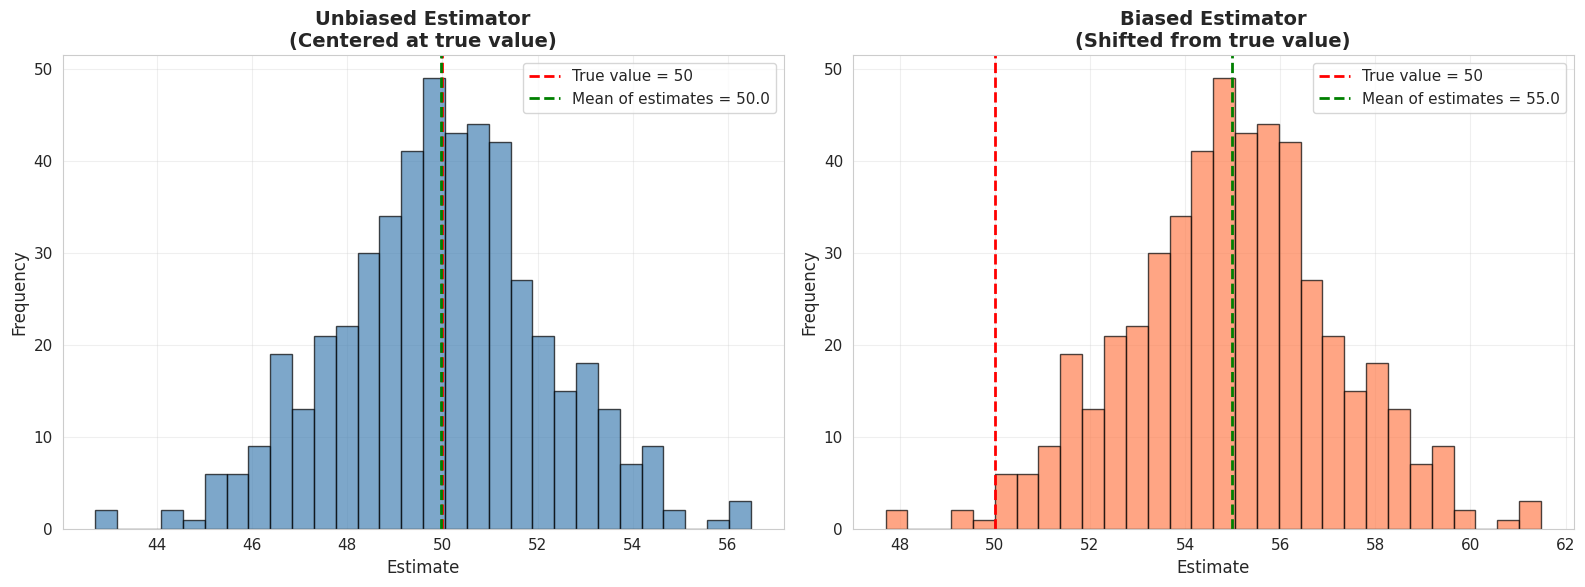

In [39]:
# Demonstrate bias and precision
np.random.seed(42)

true_param = 50
n_experiments = 500
sample_size = 20

# Unbiased estimator: sample mean
unbiased_estimates = []
for _ in range(n_experiments):
    sample = np.random.normal(loc=true_param, scale=10, size=sample_size)
    unbiased_estimates.append(np.mean(sample))

# Biased estimator: sample mean + 5 (artificially biased)
biased_estimates = [est + 5 for est in unbiased_estimates]

unbiased_estimates = np.array(unbiased_estimates)
biased_estimates = np.array(biased_estimates)

print("Comparing Biased vs Unbiased Estimators")
print("=" * 60)
print(f"True parameter value: {true_param}")
print(f"\nUnbiased Estimator (sample mean):")
print(f"  Mean of estimates: {np.mean(unbiased_estimates):.2f}")
print(f"  Bias: {np.mean(unbiased_estimates) - true_param:.2f}")
print(f"  Variance: {np.var(unbiased_estimates):.2f}")
print(f"\nBiased Estimator (sample mean + 5):")
print(f"  Mean of estimates: {np.mean(biased_estimates):.2f}")
print(f"  Bias: {np.mean(biased_estimates) - true_param:.2f}")
print(f"  Variance: {np.var(biased_estimates):.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(unbiased_estimates, bins=30, alpha=0.7, color="steelblue", edgecolor="black")
axes[0].axvline(x=true_param, color="red", linestyle="--", linewidth=2, label=f"True value = {true_param}")
axes[0].axvline(x=np.mean(unbiased_estimates), color="green", linestyle="--", linewidth=2, label=f"Mean of estimates = {np.mean(unbiased_estimates):.1f}")
axes[0].set_xlabel("Estimate", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Unbiased Estimator\n(Centered at true value)", fontsize=14, fontweight="bold")
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].hist(biased_estimates, bins=30, alpha=0.7, color="coral", edgecolor="black")
axes[1].axvline(x=true_param, color="red", linestyle="--", linewidth=2, label=f"True value = {true_param}")
axes[1].axvline(x=np.mean(biased_estimates), color="green", linestyle="--", linewidth=2, label=f"Mean of estimates = {np.mean(biased_estimates):.1f}")
axes[1].set_xlabel("Estimate", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Biased Estimator\n(Shifted from true value)", fontsize=14, fontweight="bold")
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 11: Hypothesis Testing

### 11.1 Introduction to Hypothesis Testing

Hypothesis testing is a statistical procedure to determine whether there is enough evidence to reject a conjecture about a population parameter.

**Key Components:**
- **Null Hypothesis (H₀)**: The default assumption (e.g., μ = μ₀)
- **Alternative Hypothesis (H₁)**: What we want to prove
- **Test Statistic**: A value computed from sample data
- **p-value**: Probability of observing data as extreme as ours if H₀ is true
- **Significance Level (α)**: Threshold for rejecting H₀ (commonly 0.05)

**Types of Tests:**
1. **Two-sided (Two-tailed)**: H₁: μ ≠ μ₀ (testing for any difference)
2. **One-sided (One-tailed)**:
   - Right-tailed: H₁: μ > μ₀ (testing if greater)
   - Left-tailed: H₁: μ < μ₀ (testing if less)

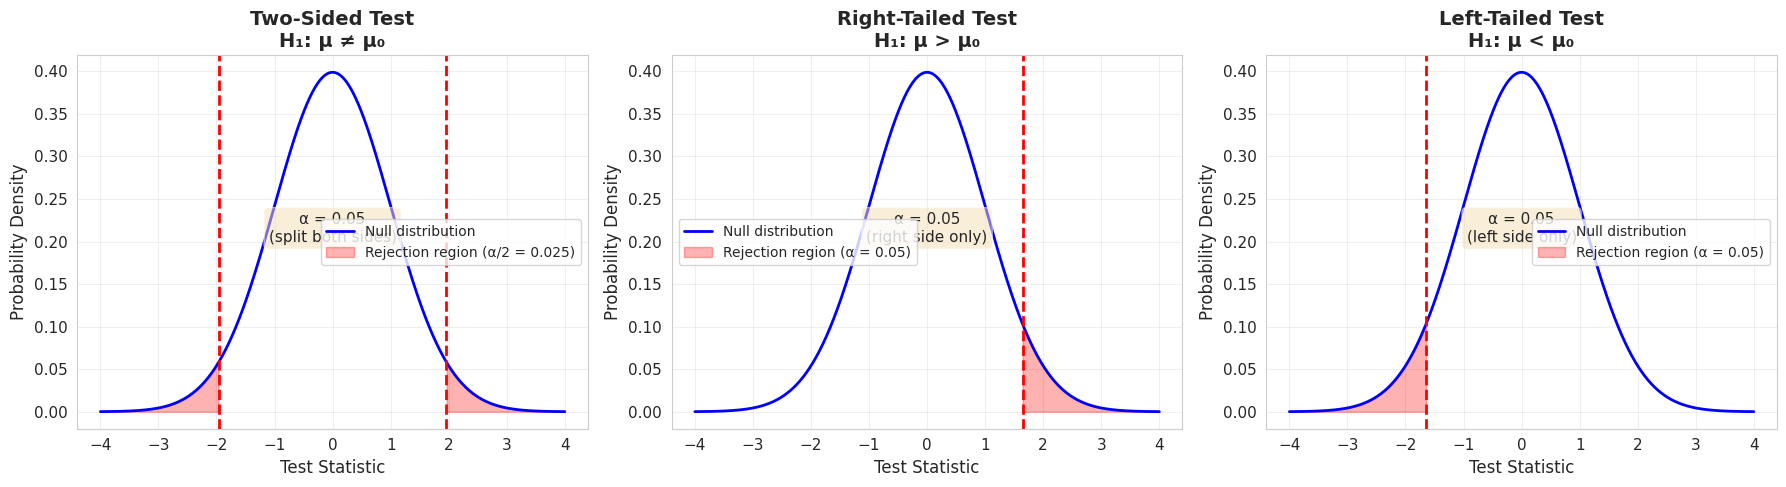


Critical Values (α = 0.05):
  Two-sided: [-1.960, 1.960]
  Right-tailed: 1.645
  Left-tailed: -1.645


In [40]:
# Visualize the three types of hypothesis tests
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
alpha = 0.05

# Two-sided test
critical_left = stats.norm.ppf(alpha/2)
critical_right = stats.norm.ppf(1 - alpha/2)
axes[0].plot(x, y, 'b-', linewidth=2, label='Null distribution')
axes[0].fill_between(x[x <= critical_left], 0, y[x <= critical_left],
                      color='red', alpha=0.3, label=f'Rejection region (α/2 = {alpha/2})')
axes[0].fill_between(x[x >= critical_right], 0, y[x >= critical_right],
                      color='red', alpha=0.3)
axes[0].axvline(critical_left, color='red', linestyle='--', linewidth=2)
axes[0].axvline(critical_right, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Two-Sided Test\nH₁: μ ≠ μ₀', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Test Statistic', fontsize=12)
axes[0].set_ylabel('Probability Density', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].text(0, 0.2, f'α = {alpha}\n(split both sides)',
             ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Right-tailed test
critical_right_one = stats.norm.ppf(1 - alpha)
axes[1].plot(x, y, 'b-', linewidth=2, label='Null distribution')
axes[1].fill_between(x[x >= critical_right_one], 0, y[x >= critical_right_one],
                      color='red', alpha=0.3, label=f'Rejection region (α = {alpha})')
axes[1].axvline(critical_right_one, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Right-Tailed Test\nH₁: μ > μ₀', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Test Statistic', fontsize=12)
axes[1].set_ylabel('Probability Density', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].text(0, 0.2, f'α = {alpha}\n(right side only)',
             ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Left-tailed test
critical_left_one = stats.norm.ppf(alpha)
axes[2].plot(x, y, 'b-', linewidth=2, label='Null distribution')
axes[2].fill_between(x[x <= critical_left_one], 0, y[x <= critical_left_one],
                      color='red', alpha=0.3, label=f'Rejection region (α = {alpha})')
axes[2].axvline(critical_left_one, color='red', linestyle='--', linewidth=2)
axes[2].set_title('Left-Tailed Test\nH₁: μ < μ₀', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Test Statistic', fontsize=12)
axes[2].set_ylabel('Probability Density', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].text(0, 0.2, f'α = {alpha}\n(left side only)',
             ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nCritical Values (α = 0.05):")
print(f"  Two-sided: [{critical_left:.3f}, {critical_right:.3f}]")
print(f"  Right-tailed: {critical_right_one:.3f}")
print(f"  Left-tailed: {critical_left_one:.3f}")

### 11.2 Two-Sided Hypothesis Test

**Use case:** Testing if a parameter is different from a specific value (could be higher OR lower).

**Example:** A manufacturer claims that light bulbs have a mean lifetime of 1000 hours. We want to test if the actual mean is different from 1000 hours.

- H₀: μ = 1000 hours
- H₁: μ ≠ 1000 hours (two-sided)

Two-Sided Hypothesis Test: Light Bulb Lifetime
H₀: μ = 1000 hours
H₁: μ ≠ 1000 hours (two-sided)

Sample statistics:
  Sample size: 50
  Sample mean: 968.73 hours
  Sample std dev: 46.68 hours

Test results:
  t-statistic: -4.7370
  p-value (two-sided): 0.0000

Decision (α = 0.05):
  ✗ Reject H₀: The mean lifetime is significantly different from 1000 hours
  → Actual mean appears to be 968.7 hours


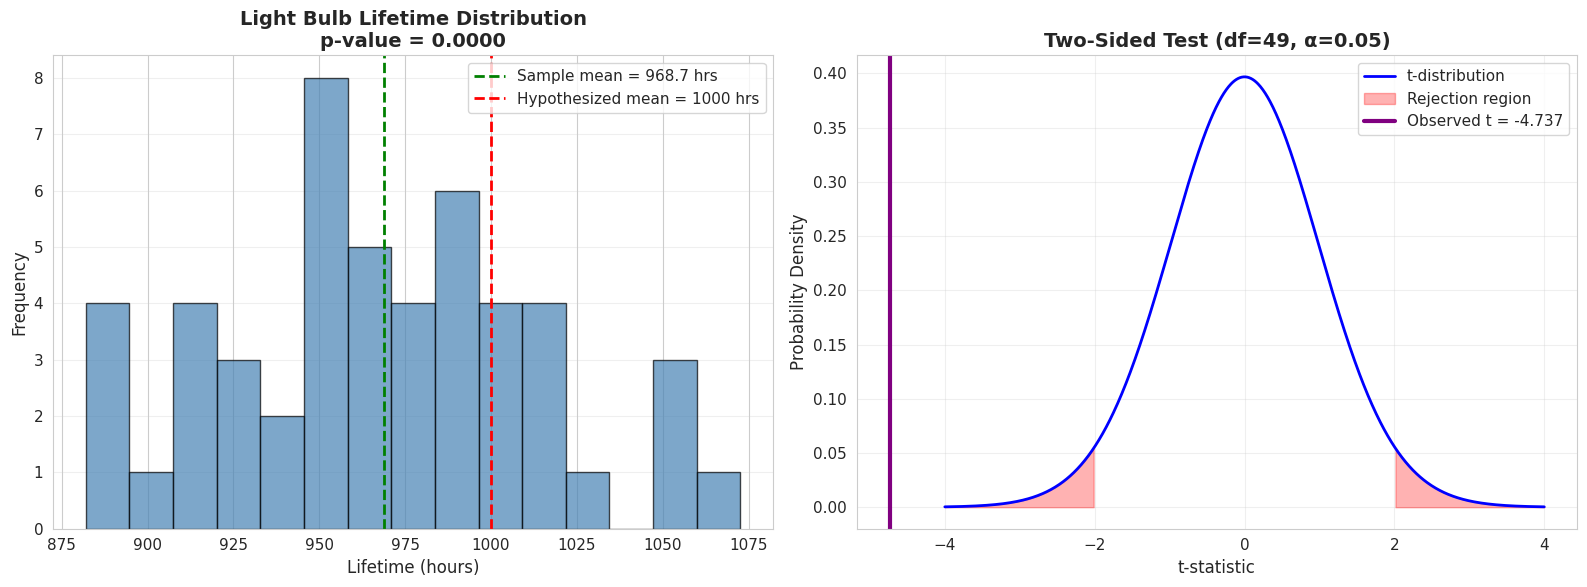

In [41]:
# Example: Two-sided test for light bulb lifetime
np.random.seed(42)

# Sample data: 50 light bulbs
# True mean is 980 hours (different from claimed 1000)
bulb_lifetimes = np.random.normal(loc=980, scale=50, size=50)

# Hypothesized mean
mu_0 = 1000

# Perform two-sided t-test
t_statistic, p_value_two_sided = stats.ttest_1samp(bulb_lifetimes, mu_0, alternative='two-sided')

print("Two-Sided Hypothesis Test: Light Bulb Lifetime")
print("=" * 60)
print(f"H₀: μ = {mu_0} hours")
print(f"H₁: μ ≠ {mu_0} hours (two-sided)")
print(f"\nSample statistics:")
print(f"  Sample size: {len(bulb_lifetimes)}")
print(f"  Sample mean: {np.mean(bulb_lifetimes):.2f} hours")
print(f"  Sample std dev: {np.std(bulb_lifetimes, ddof=1):.2f} hours")
print(f"\nTest results:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value (two-sided): {p_value_two_sided:.4f}")
print(f"\nDecision (α = 0.05):")
if p_value_two_sided < 0.05:
    print(f"  ✗ Reject H₀: The mean lifetime is significantly different from {mu_0} hours")
    print(f"  → Actual mean appears to be {np.mean(bulb_lifetimes):.1f} hours")
else:
    print(f"  ✓ Fail to reject H₀: No significant difference from {mu_0} hours")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with sample and hypothesized means
axes[0].hist(bulb_lifetimes, bins=15, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(x=np.mean(bulb_lifetimes), color='green', linestyle='--',
                linewidth=2, label=f'Sample mean = {np.mean(bulb_lifetimes):.1f} hrs')
axes[0].axvline(x=mu_0, color='red', linestyle='--',
                linewidth=2, label=f'Hypothesized mean = {mu_0} hrs')
axes[0].set_xlabel('Lifetime (hours)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Light Bulb Lifetime Distribution\np-value = {p_value_two_sided:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# t-distribution with rejection regions
df = len(bulb_lifetimes) - 1
x_t = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x_t, df)
critical_left = stats.t.ppf(0.025, df)
critical_right = stats.t.ppf(0.975, df)

axes[1].plot(x_t, y_t, 'b-', linewidth=2, label='t-distribution')
axes[1].fill_between(x_t[x_t <= critical_left], 0, y_t[x_t <= critical_left],
                      color='red', alpha=0.3, label='Rejection region')
axes[1].fill_between(x_t[x_t >= critical_right], 0, y_t[x_t >= critical_right],
                      color='red', alpha=0.3)
axes[1].axvline(t_statistic, color='purple', linestyle='-', linewidth=3,
                label=f'Observed t = {t_statistic:.3f}')
axes[1].set_xlabel('t-statistic', fontsize=12)
axes[1].set_ylabel('Probability Density', fontsize=12)
axes[1].set_title(f'Two-Sided Test (df={df}, α=0.05)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 11.3 Right-Tailed (One-Sided) Hypothesis Test

**Use case:** Testing if a parameter is greater than a specific value.

**Example:** A new teaching method claims to improve test scores. The traditional method has a mean score of 75. We want to test if the new method produces higher scores.

- H₀: μ ≤ 75
- H₁: μ > 75 (right-tailed)

Right-Tailed Hypothesis Test: Teaching Method Effectiveness
H₀: μ ≤ 75
H₁: μ > 75 (right-tailed)

Sample statistics:
  Sample size: 40
  Sample mean: 77.33
  Sample std dev: 9.45

Test results:
  t-statistic: 1.5616
  p-value (right-tailed): 0.0632

Decision (α = 0.05):
  ✓ Fail to reject H₀: No evidence that new method is better


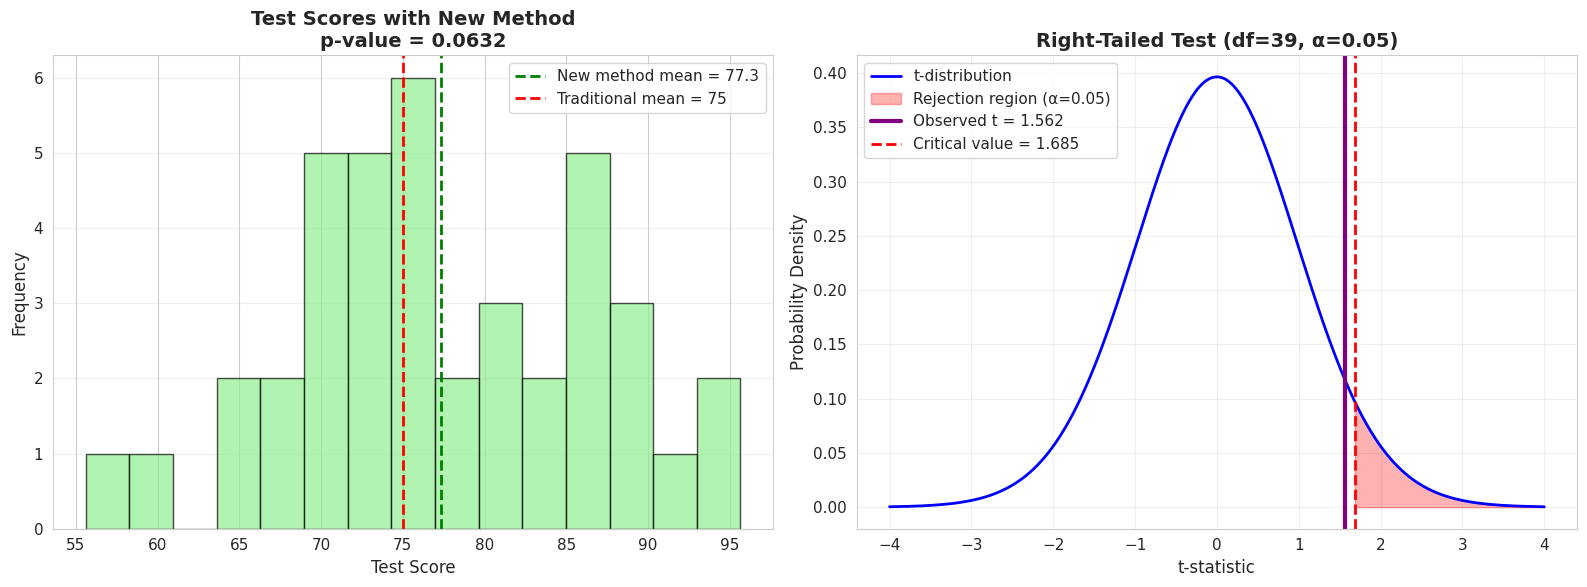

In [42]:
# Example: Right-tailed test for teaching method effectiveness
np.random.seed(123)

# Sample data: 40 students using new teaching method
# True mean is 78 (higher than traditional 75)
new_method_scores = np.random.normal(loc=78, scale=8, size=40)

# Hypothesized mean (traditional method)
mu_0 = 75

# Perform right-tailed t-test
t_statistic, p_value_right = stats.ttest_1samp(new_method_scores, mu_0, alternative='greater')

print("Right-Tailed Hypothesis Test: Teaching Method Effectiveness")
print("=" * 60)
print(f"H₀: μ ≤ {mu_0}")
print(f"H₁: μ > {mu_0} (right-tailed)")
print(f"\nSample statistics:")
print(f"  Sample size: {len(new_method_scores)}")
print(f"  Sample mean: {np.mean(new_method_scores):.2f}")
print(f"  Sample std dev: {np.std(new_method_scores, ddof=1):.2f}")
print(f"\nTest results:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value (right-tailed): {p_value_right:.4f}")
print(f"\nDecision (α = 0.05):")
if p_value_right < 0.05:
    print(f"  ✗ Reject H₀: New method produces significantly higher scores")
    print(f"  → Mean score with new method: {np.mean(new_method_scores):.1f} vs traditional: {mu_0}")
else:
    print(f"  ✓ Fail to reject H₀: No evidence that new method is better")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(new_method_scores, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0].axvline(x=np.mean(new_method_scores), color='green', linestyle='--',
                linewidth=2, label=f'New method mean = {np.mean(new_method_scores):.1f}')
axes[0].axvline(x=mu_0, color='red', linestyle='--',
                linewidth=2, label=f'Traditional mean = {mu_0}')
axes[0].set_xlabel('Test Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Test Scores with New Method\np-value = {p_value_right:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# t-distribution with right rejection region
df = len(new_method_scores) - 1
x_t = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x_t, df)
critical_right = stats.t.ppf(0.95, df)  # One-sided, α = 0.05

axes[1].plot(x_t, y_t, 'b-', linewidth=2, label='t-distribution')
axes[1].fill_between(x_t[x_t >= critical_right], 0, y_t[x_t >= critical_right],
                      color='red', alpha=0.3, label='Rejection region (α=0.05)')
axes[1].axvline(t_statistic, color='purple', linestyle='-', linewidth=3,
                label=f'Observed t = {t_statistic:.3f}')
axes[1].axvline(critical_right, color='red', linestyle='--', linewidth=2,
                label=f'Critical value = {critical_right:.3f}')
axes[1].set_xlabel('t-statistic', fontsize=12)
axes[1].set_ylabel('Probability Density', fontsize=12)
axes[1].set_title(f'Right-Tailed Test (df={df}, α=0.05)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 11.4 Left-Tailed (One-Sided) Hypothesis Test

**Use case:** Testing if a parameter is less than a specific value.

**Example:** A company claims that their new manufacturing process reduces production time. The old process takes 120 minutes on average. We want to test if the new process is faster.

- H₀: μ ≥ 120 minutes
- H₁: μ < 120 minutes (left-tailed)

Left-Tailed Hypothesis Test: Production Time Reduction
H₀: μ ≥ 120 minutes
H₁: μ < 120 minutes (left-tailed)

Sample statistics:
  Sample size: 35
  Sample mean: 116.46 minutes
  Sample std dev: 9.89 minutes

Test results:
  t-statistic: -2.1209
  p-value (left-tailed): 0.0207

Decision (α = 0.05):
  ✗ Reject H₀: New process is significantly faster
  → Time saved: 3.5 minutes per production run


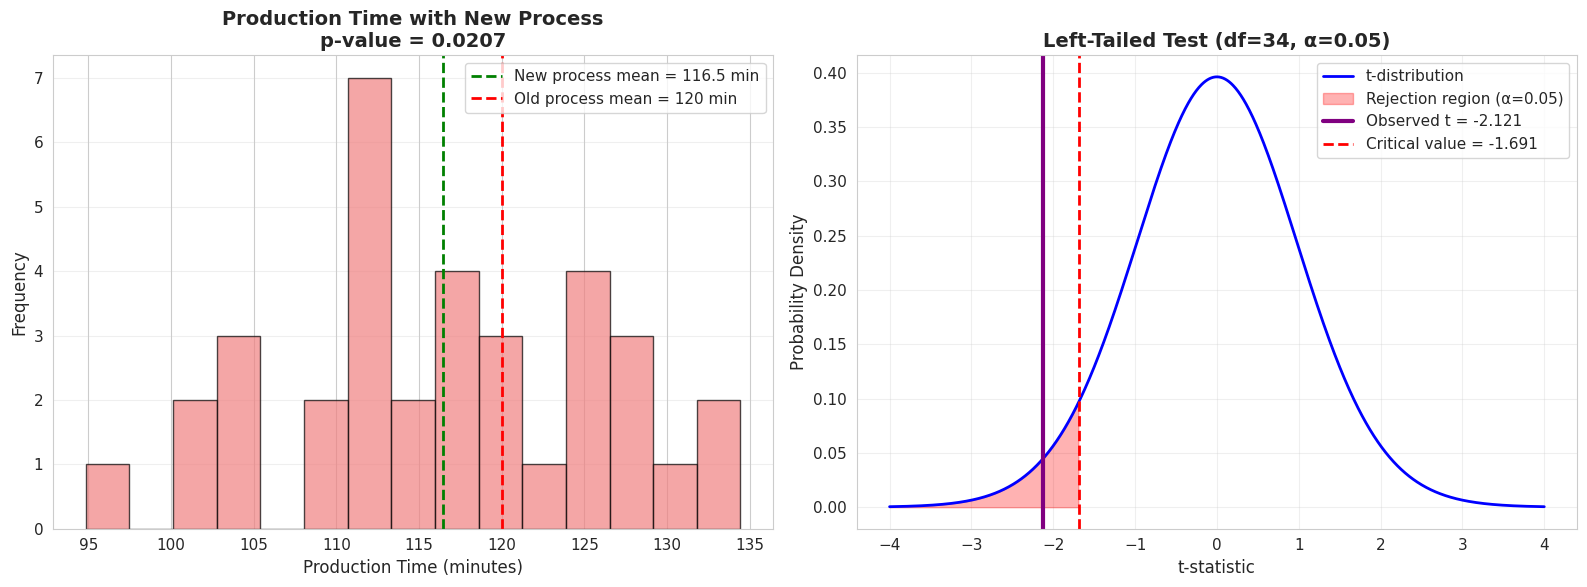

In [43]:
# Example: Left-tailed test for production time
np.random.seed(456)

# Sample data: 35 production runs with new process
# True mean is 115 minutes (faster than old 120)
new_process_times = np.random.normal(loc=115, scale=10, size=35)

# Hypothesized mean (old process)
mu_0 = 120

# Perform left-tailed t-test
t_statistic, p_value_left = stats.ttest_1samp(new_process_times, mu_0, alternative='less')

print("Left-Tailed Hypothesis Test: Production Time Reduction")
print("=" * 60)
print(f"H₀: μ ≥ {mu_0} minutes")
print(f"H₁: μ < {mu_0} minutes (left-tailed)")
print(f"\nSample statistics:")
print(f"  Sample size: {len(new_process_times)}")
print(f"  Sample mean: {np.mean(new_process_times):.2f} minutes")
print(f"  Sample std dev: {np.std(new_process_times, ddof=1):.2f} minutes")
print(f"\nTest results:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value (left-tailed): {p_value_left:.4f}")
print(f"\nDecision (α = 0.05):")
if p_value_left < 0.05:
    print(f"  ✗ Reject H₀: New process is significantly faster")
    time_saved = mu_0 - np.mean(new_process_times)
    print(f"  → Time saved: {time_saved:.1f} minutes per production run")
else:
    print(f"  ✓ Fail to reject H₀: No evidence that new process is faster")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(new_process_times, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0].axvline(x=np.mean(new_process_times), color='green', linestyle='--',
                linewidth=2, label=f'New process mean = {np.mean(new_process_times):.1f} min')
axes[0].axvline(x=mu_0, color='red', linestyle='--',
                linewidth=2, label=f'Old process mean = {mu_0} min')
axes[0].set_xlabel('Production Time (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Production Time with New Process\np-value = {p_value_left:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# t-distribution with left rejection region
df = len(new_process_times) - 1
x_t = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x_t, df)
critical_left = stats.t.ppf(0.05, df)  # One-sided, α = 0.05

axes[1].plot(x_t, y_t, 'b-', linewidth=2, label='t-distribution')
axes[1].fill_between(x_t[x_t <= critical_left], 0, y_t[x_t <= critical_left],
                      color='red', alpha=0.3, label='Rejection region (α=0.05)')
axes[1].axvline(t_statistic, color='purple', linestyle='-', linewidth=3,
                label=f'Observed t = {t_statistic:.3f}')
axes[1].axvline(critical_left, color='red', linestyle='--', linewidth=2,
                label=f'Critical value = {critical_left:.3f}')
axes[1].set_xlabel('t-statistic', fontsize=12)
axes[1].set_ylabel('Probability Density', fontsize=12)
axes[1].set_title(f'Left-Tailed Test (df={df}, α=0.05)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 11.5 Comparing One-Sided and Two-Sided Tests

**Key Differences:**

| Aspect | Two-Sided | Right-Tailed | Left-Tailed |
|--------|-----------|--------------|-------------|
| **H₁** | μ ≠ μ₀ | μ > μ₀ | μ < μ₀ |
| **Rejection Region** | Both tails | Right tail only | Left tail only |
| **α split** | α/2 each side | α on right | α on left |
| **Use when** | Testing for any difference | Testing for increase | Testing for decrease |
| **p-value** | P(\|T\| ≥ \|t\|) | P(T ≥ t) | P(T ≤ t) |

**Choosing the Right Test:**
- Use **two-sided** when you don't have a directional hypothesis (most common in research)
- Use **right-tailed** when you specifically want to prove something is greater
- Use **left-tailed** when you specifically want to prove something is less

**Important:** One-sided tests have more power to detect effects in the specified direction, but they cannot detect effects in the opposite direction!

In [44]:
# Compare all three tests on the same data
np.random.seed(789)

# Sample data
sample_data = np.random.normal(loc=105, scale=15, size=30)
mu_0 = 100

# Perform all three tests
t_stat, p_two = stats.ttest_1samp(sample_data, mu_0, alternative='two-sided')
_, p_right = stats.ttest_1samp(sample_data, mu_0, alternative='greater')
_, p_left = stats.ttest_1samp(sample_data, mu_0, alternative='less')

print("Comparison of Hypothesis Tests on Same Data")
print("=" * 60)
print(f"Sample mean: {np.mean(sample_data):.2f}")
print(f"Hypothesized mean: {mu_0}")
print(f"t-statistic: {t_stat:.4f}")
print(f"\nP-values:")
print(f"  Two-sided (H₁: μ ≠ {mu_0}):  p = {p_two:.4f}")
print(f"  Right-tailed (H₁: μ > {mu_0}): p = {p_right:.4f}")
print(f"  Left-tailed (H₁: μ < {mu_0}):  p = {p_left:.4f}")
print(f"\nNote: p_two ≈ 2 × min(p_right, p_left)")
print(f"Verification: 2 × {min(p_right, p_left):.4f} = {2*min(p_right, p_left):.4f}")

# Decision at α = 0.05
print(f"\nDecisions at α = 0.05:")
print(f"  Two-sided: {'Reject H₀' if p_two < 0.05 else 'Fail to reject H₀'}")
print(f"  Right-tailed: {'Reject H₀' if p_right < 0.05 else 'Fail to reject H₀'}")
print(f"  Left-tailed: {'Reject H₀' if p_left < 0.05 else 'Fail to reject H₀'}")

Comparison of Hypothesis Tests on Same Data
Sample mean: 104.30
Hypothesized mean: 100
t-statistic: 1.7852

P-values:
  Two-sided (H₁: μ ≠ 100):  p = 0.0847
  Right-tailed (H₁: μ > 100): p = 0.0423
  Left-tailed (H₁: μ < 100):  p = 0.9577

Note: p_two ≈ 2 × min(p_right, p_left)
Verification: 2 × 0.0423 = 0.0847

Decisions at α = 0.05:
  Two-sided: Fail to reject H₀
  Right-tailed: Reject H₀
  Left-tailed: Fail to reject H₀


## Part 12: Summary

This comprehensive notebook covered all major topics from the DA5400W slides:

**Probability (Pages 23-47):**
- Random phenomena and sample spaces
- Counting principles (permutations and combinations)
- Probability axioms and rules
- Conditional probability and independence
- Bayes theorem with medical diagnosis example

**Descriptive Statistics (Pages 91-105):**
- Measures of central tendency (mean, median, mode)
- Measures of dispersion (variance, standard deviation)
- Effect of outliers on statistics
- SME company salary example from slides

**Parameter Estimation (Pages 117-126):**
- Point estimators and interval estimators
- Sampling distributions
- Properties: unbiased, precision, consistency
- Effect of sample size on estimation

**Hypothesis Testing (Page 117+):**
- Null and alternative hypotheses
- p-values and significance levels
- One-sample and two-sample t-tests
- Medicine comparison example from slides

All concepts demonstrated with practical Python code using NumPy, SciPy, and Matplotlib!